# TMA4320 Prosjekt 2  - Teknisk fysikk

#### Kandidatnummere: 10077, 10142, 10096

### Introduksjon

Helt siden de første båtene ble lagd for 7'000 til 10'000 år siden, har båter vært i stadig utvikling. Til å begynne med var de svært enkle, og bestod ofte bare av én enkelt trestamme som ble hulet ut. Etterhvert gjorde seilbåtene sitt inntog, og spesielt etter den industrielle revolusjon gjorde den marine teknologien store fremskritt. Vi kjenner alle til de gigantiske containerskipene som i dag er en svært viktig del av å knytte verden sammen.

Når det kommer til skipsdesign har selvfølgelig utvikling av naturvitenskap og fysikk vært en nøkkel til å forstå hvordan man best mulig, og mest mulig effektivt, skal konstruere båter. Det å forstå hvilke krefter som virker på båten, og hvordan de virker, er naturligvisk kritisk for at båten skal fungere etter sin hensikt. Selv om det fantes store og komplekse båter for flere århundrer siden har numeriske verktøy revolusjonert beregningene som inngår i utvikling av båter og skip. Modellering av hvordan systemer utvikler seg over tid, for eksempel en båt som blir utsatt for forskjellige krefter, koker nesten alltid ned til løsning av differesiallikninger. Her er numeriske verktøy et uvurdelig hjelpemiddel.

I dette prosjektet skal vi utifra en enkel skipsmodell forsøke å modellere bevegelsene til en båt på vannet. Vi skal se på hvordan oppdrift, tyngdekraft, friksjon, bølger, vind og last virker på båten. Vi vil beholde nok nøyaktighet til å gi et noenlunde realistisk bilde av virkeligheten. Likevel, for å lette på mye av koden, vil modellen av både båten, men også flere av kreftene, være forenklet. Målet med dette prosjektet vil tross alt ikke være å modellere en båt eller et skip på havet nøyaktig, men heller å danne et bilde av hvilken effekt ulike fysiske fenomener har på vår skipsmodell. I tillegg vil mye av målet være å implementere ulike numeriske algoritmer for å løse differensialliknger, og se på fordelene og ulempene med de ulike metodene.

### Skipsmodellen og oppdrift

Skipsmodellen er veldig enkel, men det trenger ikke bety at den nødvendigvis er så langt unna virkeligheten. Alle beregninger foregår i planet; kalkulasjonene våre gjøres altså per lengeenhet. Skipet vårt er en kompakt halvdisk med radius $R$ konstant masse per arealenhet $\sigma$. Derfra kan vi med enkel mekanikk regner ut at massesenteret, $C$, vil ligge $\frac{4R}{3\pi}$ lengdeenheter under midtpunktet på dekk, også kalt metasenteret (det vil si midten av den rette streken på halvsirkelen). 

Når vi ser på bevegelsene til skipet modellerer vi svingninger om en akse inn i planet gjennom massesenteret. Treghetsmomentet til båten om denne aksen er

$$
\begin{aligned}
I_c&=\frac{1}{2}mR^2 \left( 1 - \frac{32}{9\pi^2} \right)
\end{aligned}
$$

Men fordi rotasjonsaksen går gjennom $C$ vil ikke tyngdekraften bidra til det totale dreiemomentet. Til å begynne med ønsker vi bare å se på en båt som ligger i vannet. Hvis vi ikke gir den noen initiell vinkelhastighet eller utslag vil den ligge i ro. Med for eksempel et startutslag vil derimot båten rotere mot likevekt fordi oppdriftskraften vil utgjøre et dreiemoment. Oppdriftskraften får vi fra Arkimedes lov. Ved likevekt vil tyngden av skipet være lik den av det fortrengte vannet. For utleding viser vi til oppgavebeskrivelsen. Arealet av det fortrengte vannet vil være

$$
\begin{aligned}
A_0&=\frac{\sigma \pi R^2}{2\sigma_0} \hspace{2cm} (1)
\end{aligned}
$$

hvor $\sigma_0$ er vannets massetetthet. Dette arealet kan også uttrykkes generelt (for posisjoner utenfor likevekt)


$$
\begin{aligned}
A&=\frac{1}{2}R^2(\gamma - \sin\gamma) \hspace{1cm} (2)
\end{aligned}
$$

hvor $\gamma$ er sektorvinkelen fra metasenteret til der kanten av båten møter vannet (se figur 1). Altså er $\gamma = \beta$ når båten er i likevekt. Oppdriftskraftens angripsunkt vil være i punktet $B$, massesenteret til det fortrengte vannet. Det kan vises at avstanden fra $M$ til $B$ vil være

$$
\begin{aligned}
Y_{MB}&=R \cdot \frac{4 \sin^3(\gamma/2)}{3(\gamma -\sin\gamma)}
\end{aligned}
$$

Arkimedes lov gir at oppdriftskraften er


$$
\begin{aligned}
F_B&=\sigma_0Ag
\end{aligned}
$$

hvor $g$ er tyngdeakselerasjonen.

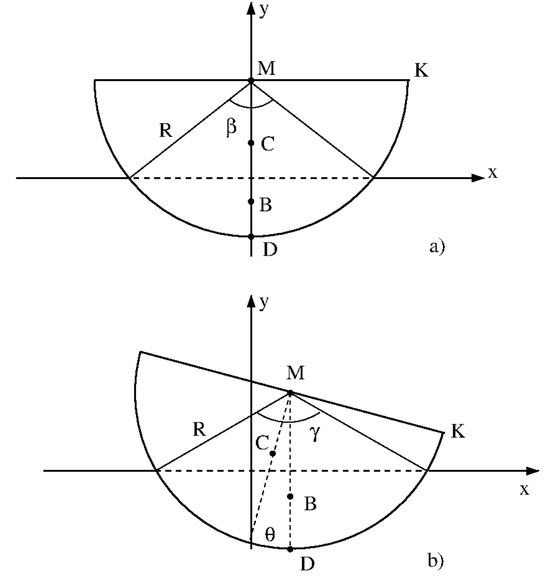

In [1]:
from PIL import Image
import requests
from io import BytesIO

def resize_img(img, basewidth):
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    return img

url="https://github.com/simennes/VitberV22/blob/main/Figur%201.png?raw=true"
response = requests.get(url)
img = resize_img(Image.open(BytesIO(response.content)), 550)
img

Figur 1. a) viser båten i en likevektsposisjon. b) viser båten med et vinkelutslag.

Kilde: Prosjektbeskrivelse

Kode for størrelsesjustering hentet fra https://stackoverflow.com/a/451580

## Svingninger som følge av oppdrift
### Likevektsvinkel og fikspunktiterasjon

Til å begynne med ønsker vi kun å se på rotasjon som følge av oppdrift. For å studere rotasjonen gjør vi i tillegg en forenkling. Vi ser bort fra forflytnigen til massesenteret, det vil si vi antar

$$
\begin{aligned}
|F_B| &= |F_G|
\end{aligned}
$$

til enhver tid. Fordi $F_B$ kun avhenger av konstanter og $A$ antar vi dermed at arealet av det fortrengte vannet er konstant. Siden arealet er konstant får vi  $(1) = (2)$ altså


$$
\begin{aligned}
\beta-\sin\beta=\frac{\pi\sigma}{\sigma_0} \hspace{1cm} (3)
\end{aligned}
$$

Dermed er $(3)$ en likning vi kan løse for å finne $\beta$, vinkelen som sier hvor mye av skipet som er under vann ved likevekt. Ved å omrokkere $(3)$ får vi

$$
\begin{aligned}
\beta=\frac{\pi\sigma}{\sigma_0} + \sin\beta
\end{aligned}
$$

som kan løses ved fikspunktiterasjon. Først importerer vi bibliotekene vi trenger. I cellen under defineres konstantene som ble diskutert tidligere. Deretter implementerer vi fikspunktiterasjon for å løse $(3)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Definere konstanter:                   # Enhet:
sigma0 = 1000                            # [kg/m^2]
sigma = 500                              # [kg/m^2]
R = 10                                   # [m]
As = 0.5*np.pi*R**2                      # [m^2]
m = As*sigma                             # [kg]
I_c = 0.5*m*(R**2)*(1-32/(9*(np.pi)**2)) # [kg*m^2]
h = 4*R/(3*np.pi)                        # [m]
g = 9.81                                 # [m/s^2]

### Oppgave 1
#### a)
Når vi løser uttrykket $\beta=g(\beta)$ ved hjelp av fikspunktiterasjon, starter vi med en initialverdi $\beta_0=120^{\circ}=\frac{2\pi}{3} \text{ rad}$, og setter deretter neste verdi lik $\beta_1=g(\beta_0), \beta_2=g(\beta_1), \cdots,\beta_k=g(\beta_{k-1})$. Implementerer dette i funksjonen `fikspunkt`, samt $g(\beta)$ i funksjonen `b`.

In [4]:
def b(beta):
    return np.pi*sigma/sigma0+np.sin(beta)

# Kode for fikspunktiterasjon fra notater:
def fikspunkt(g, beta0, tol=1.e-8, max_iter=30):
    ''' 
    Input:
        g:     Funksjon som skal løses
        beta0: Initialverdi
        tol:   Toleranse
    Output:
        beta:  Siste verdi, etter ønsket toleranse er oppnådd
    '''
    beta = beta0 
    for k in range(max_iter):        
        beta_old = beta                        # Forrige betaverdi
        beta = g(beta)                         # Ny betaverdi
        err = abs(beta-beta_old)               # Feilestimat
        if err < tol:
            break
    return beta

tol = 1.e-9
beta = fikspunkt(b, 2*np.pi/3, tol, 100)
print(f"beta = {round(beta,10)} = {round(np.degrees(beta),6)} grader, med en nøyaktighet på {tol} rad.")

beta = 2.3098814604 = 132.346459 grader, med en nøyaktighet på 1e-09 rad.


Vi får dermed at likevektsvinkelen $\beta=2.310 \text{ rad} = 132.35^\circ.$ Toleransen satte vi til $10^{-9}$ for å fjerne all tvil om hvorvidt feilen fra fikspunktiterasjonen er tilstrekkelig liten til at den ikke medfører feil videre.

#### b)
Med vinkelen $\beta$ på plass kan vi også finne y-koordinatet til andre viktige punkter i likevekt. Disse vil vi få bruk for senere. Høydene er relativt vannoverflaten, som vi legger i $y=0$, og de aktuelle punktene er metasenteret $M$, massesenter $C$, oppdriftssenter $B$, og til skipets bunnpunkt $D$. Vi kaller variablene henholdsvis $y_M^0, y_C^0, y_B^0$ og $y_D^0$, der 0 betegner at de gjelder for likevekt, siden høydeverdiene forandres når vi senere innfører flere momenter. Utledningen av uttrykkene for koordinatene baserer seg på enkle trigonometriske betraktninger og vi viser til oppgavebeskrivelsen for detaljene.

In [5]:
y0_M = R*np.cos(beta/2)
y0_C = y0_M - h
y0_B = y0_M - (4*R*(np.sin(beta/2))**3) / (3*(beta-np.sin(beta)))
y0_D = y0_M - R

print(f"y0_M = {y0_M:.5f}, y0_C = {y0_C:.5f}, y0_B = {y0_B:.5f}, y0_D = {y0_D:.5f}")

y0_M = 4.03973, y0_C = -0.20440, y0_B = -2.45792, y0_D = -5.96027


Som vi ser er metasenteret omtrent 4 meter over vannoverflaten, mens massesenteret, i tillegg til oppdriftskraftens angrepspunkt og skipets bunnpunkt, befinner seg under vannets overflate.

### Løsninger med Eulers metode
#### c)
Med de konstantene vi nå har definert, kan vi se på en forenklet modell for for skipets rotasjon om massesenteret i likevektsstillingen. De eneste kreftene vi inkluderer er oppdriftskraften og tyngdekraften, der oppdriftskraften bidrar med et dreiemoment $\tau_B$ om massesenteret, som medfører en harmonisk svingning med vinkelutslag $\theta(t)$ og vinkelfart $\omega(t)=\frac{d\theta(t)}{dt}$. For å løse dette numerisk introduserer vi vektoren $\vec{w}(t)=[\theta (t) \hskip1em \omega (t)]^T$, som vi kan derivere og kombinere med Newtons andre lov for rotasjon, $\Sigma\tau=I_c\frac{d\omega}{dt}\Leftrightarrow\frac{d\omega}{dt}=\frac{\Sigma\tau}{I_c}$, slik at vi får

$$
\frac{d\vec{w}}{dt}=\left[\frac{d\theta}{dt} \hskip1em \frac{d\omega}{dt}\right]^T=\left[\omega(t) \hskip1em \frac{\Sigma\tau}{I_c}\right]^T=\vec{f}(t,\vec{w})
$$

Ettersom vi bare får et bidrag til dreiemomentet fra oppdriftskraften, $\tau_B = -F_Bh\sin(\theta)$, får vi følgende uttrykk for vår vektorfunksjon $\vec{f}(t,\vec{w})$:

$$
\vec{f}(t,\vec{w})=\left[\omega(t) \hskip1em -\frac{F_Bh\sin(\theta(t))}{I_c}\right]^T
$$

#### d)
For å løse Newtons andre lov for rotasjon numerisk, bruker vi i denne deloppgaven Eulers metode. Denne fungerer ved at vi utfører en Taylor-ekspansjon av funksjonen vi ønsker å approksime i $t+dt$, rundt det kjente punktet $\vec{w}(t=0)$, som gir oss rekken

$$
\vec{w}(t+dt)=\vec{w}(t)+dt\cdot\frac{d\vec{w}(t)}{dt}+\frac{1}{2}dt^2\cdot\frac{d^2\vec{w}(t)}{dt^2}\cdots
$$

Ved å bruke en steglengde, $dt$, som er tilstrekkelig liten, blir 
$$
\begin{aligned}
\vec{w}(t+dt)\approx\vec{w}(t)+dt\cdot\frac{d\vec{w}(t)}{dt}=\vec{w}(t)+dt\cdot f(t, \vec{w})
\end{aligned}
$$

som vi bruker for å finne en approksimasjon av $\vec{w}(t)$ iterativt. Løsningen av hvert steg er, som vi ser fra likningen over, uavhengig av seg selv, og metoden kalles derfor en eksplisitt metode. Vi implementerer funksjonene `euler`, som gjør ett steg i Eulers metode, og `ode_solver`, som løser ODE-en ved bruk av en input-metode.

In [6]:
def euler(f, t, y, dt):
    # Finner neste verdi
    y_next = y + dt*f(t, y)
    t_next = t + dt
    return t_next, y_next

def ode_solver(f, t0, tend, w0, dt, betingelser=[0,False,False], method=euler):
    '''
    Input:
        f:           Høyre side av differensiallikning vi vil løse
        t0:          Starttid
        tend:        Sluttid
        w0:          Initialbetingelse
        dt:          Steglengde
        betingelser: For senere oppgaver, på formen: [ml/m (desimaltall), gjerde (bool), FSAL (bool)]
        method:      Ønsket metode for å løse differensiallikning. Standardmetode er Euler.
    
    Output:
        t_array:     Array med alle t-verdier
        w_array:     Array med alle w (løsninger)
    '''

    w_array = np.array([w0])    # Array med numeriske løsninger for w-verdier
    t_array = np.array([t0])    # Array med t-verdier

    # Initiere første tn- og wn-verdi
    tn = t0
    wn = w0

    # Variable for last 
    global ml
    ml = betingelser[0] * m
    gjerde = betingelser[1]

    # FSAL
    if betingelser[2]:
        k_curr = f(t0, w0)

    # Itererer frem til t = tend
    while tn < tend - 1.e-10:             # Buffer for trunkeringsfeil
        if betingelser[2]:                # FSAL (Oppgave 2h)
            k_old = k_curr
            tn, wn, k_curr = method(f, tn, wn, dt, k_curr)
        else:
            tn, wn = method(f, tn, wn, dt)    # Ett steg med valgt metode
        
        # Oppgave 2c) ###################################################################
        if np.all(wn == w_array[-1]):     # Sjekker om skipet har sluttet å bevege seg
            fortegn = np.sign(wn[0])
            lengde = np.size(wn)

            # Oppdaterer w som forklart i 2c
            wn = np.concatenate((np.array([fortegn*np.pi/2]), np.zeros(lengde-1)))
        #################################################################################

        # Oppgave 2d) ###################################################################
        if len(wn) == 8:                            # if skipet har last:
            if (not gjerde) and (abs(wn[6]) > R):   # -  if last falt av skipet:
                    ml = 0                          # -  -  ml = 0
                    wn[6] = np.sign(wn[6])*R        # -  -  x_L = +- R
            elif (gjerde) and (np.abs(wn[6]) >= R): # -  if last truffet gjerdet:
                wn[7] = 0                           # -  -  v_L = 0
                wn[6] = np.sign(wn[6])*R            # -  -  x_L = +-R
        #################################################################################
        
        # Passer på at siste t-verdi og tilhørende y-verdi er for nøyaktig tn = tend
        if tn > tend:               # Hvis vi har iterert for langt:
            dt = tend - t_array[-1] # -  Endre dt så vi treffer akkurat tend
            tn = t_array[-1]        # -  Sett tn og wn tilbake til forrige verdier
            wn = w_array[-1]        
            if betingelser[2]:
                k_curr = k_old      # -  Sett k_curr til forrige verdi (for oppg. 2h)
        else:
            w_array = np.concatenate((w_array, np.array([wn])))
            t_array = np.append(t_array,tn)

    return t_array, w_array

Ved hvert steg i Eulers metode neglisjerer vi alle ledd fra og med ledd 3 av Taylorekspansjonen, som medfører en lokal trunkeringsfeil for hvert enkelt steg, og en total global feil i et punkt $\theta(t)$. Det kan vises at metoden er av orden 1, som betyr at den globale feilen $e_n$ er proporsjonal med steglengden, $e_n=C\cdot dt$, slik at en halvering i steglengde medfører en halvering av den globale feilen. Vi starter derfor med å løse Newtons andre lov for rotasjon ved hjelp av Eulers metode med steglengde $dt=0.01$ og finner den globale feilen i et fornuftig punkt, før vi vurderer om steglengden gir et presist nok resultat.

Først må vi imidlertid definere oppdriftskraften i differensiallikningen, $F_B=A\sigma_0g$, der A tilsvarer arealet av skipets tverrsnitt som befinner seg under vann, som vi vet har verdi $A_0=\frac{\sigma}{\sigma0}\pi R^2$ i likevekt.

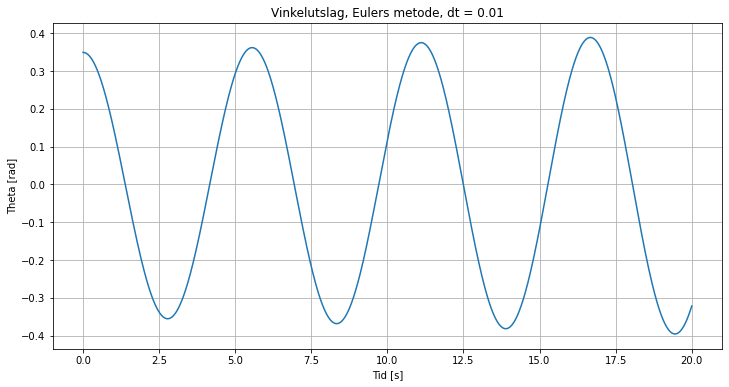

In [7]:
# Definerer nye konstanter
A_0 = 0.5*R**2*np.pi*sigma/sigma0
F_B = A_0*sigma0*g

# Definerer funksjonen fra oppgave c)
def f(t, w):
    tau_B = -F_B*h*np.sin(w[0])
    dw = np.array([w[1]        ,
                   tau_B / I_c])
    return dw

# Plottefunksjon
def plotter(t, w, tittel, enhet_x, enhet_y, plotte_variabel, legend=None, xmax = None):
    plt.figure(figsize=(12,6))

    # Plotter alle w mot tilhørende t fra input-arrays
    if plotte_variabel == 10:  # plotte_variabel = 10 betyr at vi skal plotte med logaritmisk skala
        for w_val in w:
            plt.loglog(t, w_val)

    else:   # Plotte vanlig
        for i in range(len(t)):
            plt.plot(t[i], w[i][:, plotte_variabel])

    plt.title(tittel)
    plt.xlabel(enhet_x)
    plt.ylabel(enhet_y)
    if legend != None:
        plt.legend(legend)
    if xmax != None:
        plt.xlim(right = xmax)
    plt.grid()
    plt.show()

# Initialbetingelser
t0 = 0
tend = 20
w0 = np.array([np.radians(20), 0]) # w0 = [20 grader, 0]
dt = 0.01

# Finner t og w for dt = 0.01, og plotter vinkelutslaget
t, w = ode_solver(f, t0, tend, w0, dt)
plotter([t], [w], "Vinkelutslag, Eulers metode, dt = 0.01", "Tid [s]", "Theta [rad]", 0)

Med steglengde $dt=0.01$ ser vi at vinkelutslaget øker med tiden. I den forenklede modellen vi nå ser på er det ingen dempende eller forsterkende krefter, og amplituden skal derfor holde seg konstant, så økningen må skyldes feilen i Eulers metode. Startpunktet er kjent, $\theta(t=0)=20^{\circ}\approx 0.349 \text{ rad}$, så for å finne feilen ser vi på differansen mellom startpunktet og tallverdien til det siste minimumspunktet ved ca. 19 sekunder. Vi finner da ut hvor mye amplituden øker fra $t=0$ til $t\approx 19$.

In [8]:
theta_0 = 20*np.pi/180          # Startvinkel
minimum = np.abs(min(w[:,0]))   # Minimumsverdi
e_n = minimum - theta_0         # Global feil i minimumspunktet

print(f"Differanse mellom sluttamplitude og startamplitude: e_n = {e_n:.4f} rad = {np.degrees(e_n):.2f} grader")

Differanse mellom sluttamplitude og startamplitude: e_n = 0.0466 rad = 2.67 grader


Vi tenker feilen ikke bør være større enn $e_n=0.1^{\circ}$, for å forsikre oss om at feil i andre approksimasjoner vi skal gjøre senere, slik som småvinkelapproksimasjonen, ikke skal påvirkes av feilen i Eulers metode. Ettersom vi vet at feilen er proporsjonal med steglengden, kan vi nå bestemme en ny $dt$ slik at vi får en feil $e_n \leq0.1^{\circ}$. 
$$
\frac{e_{n,new}}{e_n} = \frac{dt_{new}}{dt} \Rightarrow dt_{new} = dt \cdot\frac{e_{n,new}}{e_n}
$$
$$
dt_{new} = 0.01 \cdot \frac{0.1^{\circ}}{2.67 ^{\circ}} = 0.000375 \approx 0.00035
$$


 Vi setter derfor $dt=0.00035$, og plotter på nytt.

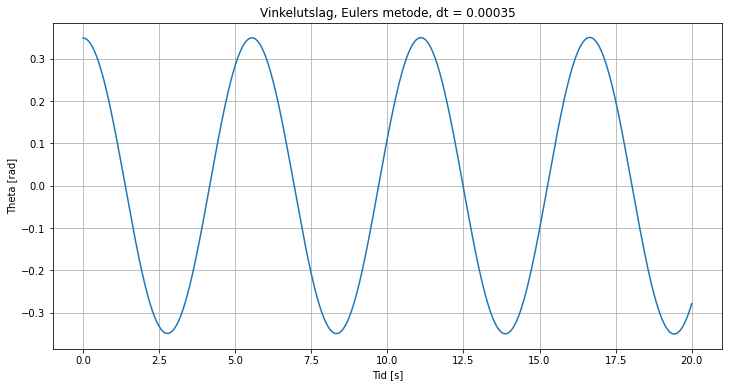

Startverdi = 20 grader
Største utslagsverdi for theta: 20.09 grader
Global feil e_n = 0.088 grader
Tid for Eulers metode med dt = 0.00035: 2.06 sekunder


In [9]:
# Oppdaterer dt
dt = 0.00035

# Finner t og w for dt = 0.00035, noterer tiden det tar og plotter vinkelutslaget
tid0 = time.time()
t, w = ode_solver(f, t0, tend, w0, dt)
tid1 = time.time()

plotter([t], [w], "Vinkelutslag, Eulers metode, dt = 0.00035", "Tid [s]", "Theta [rad]", 0)

print(f"Startverdi = 20 grader")
print(f"Største utslagsverdi for theta: {np.degrees(np.abs(min(w[:,0]))):.2f} grader")
print(f"Global feil e_n = {(np.degrees(np.abs(min(w[:,0]))) - 20):.3f} grader")
print(f"Tid for Eulers metode med dt = {dt}: {(tid1-tid0):.2f} sekunder")

Den globale feilen i siste minimumspunkt med $dt=0.00035$ er under 0.1 grad, samtidig som koden tok relativt kort tid å kjøre, og vi er derfor fornøyde med presisjonen.

### Småvinkelapproksimasjon
#### e)
Nå som vi har funnet en steglengde som gir en akseptabel lokal trunkeringsfeil for Eulermetoden, kan vi se på hvor nøyaktig småvinkelapproksimasjonen $\sin{\theta}\approx \theta$ er for ulike startvinkelverdier. Vi plotter derfor først løsningen av Newtons andre lov for rotasjon med og uten småvinkelapproksimasjonen for $\theta(0)=20^{\circ}$, sammen, og gjør deretter det samme for $\theta(0)=1^{\circ}$.

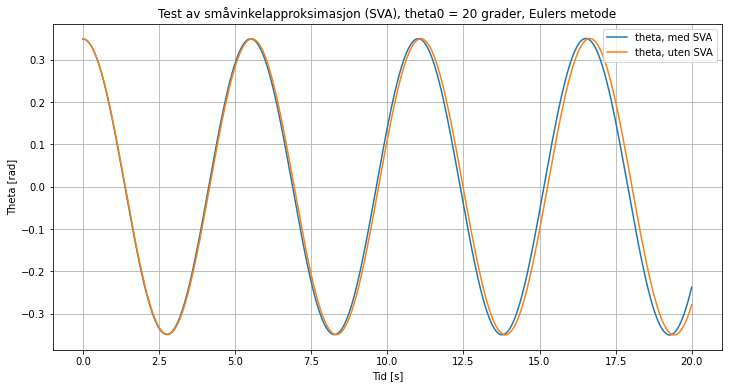

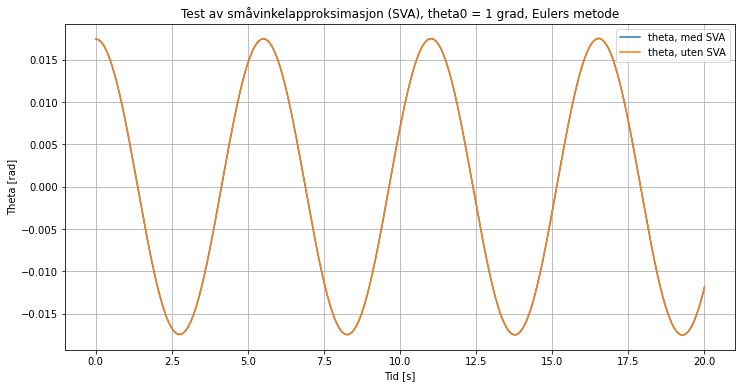

Feil i småvinkelapproksimasjonen med startvinkel 20 grader: 2.37 grader
Feil i småvinkelapproksimasjonen med startvinkel 1 grad: 0.00032 grader


In [10]:
def f_liten_vinkel(t, w):
    tau_B = -F_B*h*w[0]   # Bruker w[0] istedenfor np.sin(w[0])
    dw = np.array([w[1],
                   tau_B / I_c])
    return dw

dt = 0.00035

# theta0 = 20 grader
w0 = np.array([np.radians(20), 0])
t_20, w_20 = ode_solver(f, t0, tend, w0, dt)
t_liten_20, w_liten_20 = ode_solver(f_liten_vinkel, t0, tend, w0, dt)
plotter([t_liten_20, t_20], [w_liten_20, w_20],"Test av småvinkelapproksimasjon (SVA), theta0 = 20 grader, Eulers metode", "Tid [s]", "Theta [rad]", 0, ["theta, med SVA", "theta, uten SVA"])

# theta0 = 1 grad
w0 = np.array([np.radians(1), 0])
t_1, w_1 = ode_solver(f, t0, tend, w0, dt)
t_liten_1, w_liten_1 = ode_solver(f_liten_vinkel, t0, tend, w0, dt)
plotter([t_liten_1, t_1], [w_liten_1, w_1],"Test av småvinkelapproksimasjon (SVA), theta0 = 1 grad, Eulers metode", "Tid [s]", "Theta [rad]", 0, ["theta, med SVA", "theta, uten SVA"])

# Skriver ut feilen i sluttpunktet.
print(f"Feil i småvinkelapproksimasjonen med startvinkel 20 grader: {np.degrees(np.abs(w_20[-1,0]-w_liten_20[-1,0])):.2f} grader")
print(f"Feil i småvinkelapproksimasjonen med startvinkel 1 grad: {np.degrees(np.abs(w_1[-1,0]-w_liten_1[-1,0])):.5f} grader")

Som vi ser blir feilen i småvinkelapproksimasjonen ekstremt liten når startvinkelen er så liten som 1 grad, så approksimasjonen er i dette tilfellet god. Det er også verdt å legge merke til hvor liten feilen blir for startvinkel 20, med et utslag på kun 2,37 grader etter 20 sekunder. Det er likevel ikke neglisjerbart, som viser at vi ikke burde bruke småvinkelapproksimasjonen når startvinkelen er 20 grader.

### Analytisk løsning og Runge Kutta 4
#### f)
En annen metode for å løse differensiallikninger er fjerde ordens Runge-Kuttas metode (RK4), som i likhet med Eulers også er eksplisitt. Det er denne vi først og fremst kommer til å bruke videre i oppgaven.

In [11]:
# Definerer Runge-Kuttas metode, RK4:
def RK4(f, t, w, dt):
    # Finner k1, k2, k3, k4 og wn, og returnerer
    k1 = f(t, w)
    k2 = f(t + dt/2, w + dt*k1/2)
    k3 = f(t + dt/2, w + dt*k2/2)
    k4 = f(t + dt, w + dt*k3)
    wn = w + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t + dt, wn

Denne er som nevnt en fjerde ordens metode, slik at den globale feilen $e_n=C\cdot dt^4$. Vi forventer derfor at Runge-Kuttas metode er mye mer nøyaktig enn Eulers, som vi kommer til å se nærmere på i oppgave 1h).

#### g)

Småvinkelapproksimasjonen $\sin{\theta}\approx\theta$ kombinert med Newtons andre lov for rotasjon om massesenteret C, gir likningen $-mgh\theta=I_{c}\ddot{\theta}$. Generell løsning på denne differensiallikningen blir på formen


$$
\tilde{\theta}(t) = A\cos(\omega_0t)+B\sin(\omega_0t),\hskip1em\omega_0=\sqrt{\frac{mgh}{I_c}}
$$

Vi har oppgitt initialbetingelsene


$$
\tilde{\theta}(t=0)=0.01\Rightarrow A\cos{0}=0.01\Rightarrow A=0.01
$$

og

$$
\tilde{\theta}'(t=0)= 0\Rightarrow B\omega_0\cos(0)=0\Rightarrow B\omega_0=0\Rightarrow B=0.
$$

Den analytiske løsningen for skipets vinkelutslag med småvinkelapproksimasjon blir dermed $\tilde{\theta}(t)=0.01\cos{(\sqrt{\frac{mgh}{I_c}}t)}$. Vi implementerer uttrykket i funksjonen `f_analytisk`.

In [12]:
def f_analytisk(t):
    theta = 0.01*np.cos(np.sqrt(m*g*h/I_c)*t)
    return theta

### Feil i RK4 og Euler
#### h)
Nå som vi har den analytiske løsningen på skipets bevegelse med småvinkelapproksimasjon, kan vi plotte feilen i de numeriske løsningene med Runge-Kutta 4 og Eulers metode, for så å studere forskjellene i nøyaktighet mellom de to. Vi gjør dette med initialbetingelser $\omega(t=0)=0$ og $\theta(t=0)=0.01\text{ rad}$, og bruker logaritmiske akser.

In [13]:
w0 = np.array([0.01,0])
t0 = 0
tend = 20

# Finner den analytiske løsningen
theta_analytisk = f_analytisk(20)

# Lager et array med alle dt-verdier
dt_vals = np.linspace(0.001, 0.1, 1000)
error_vals_RK4 = np.array([])
error_vals_euler = np.array([])

# Finner numeriske løsninger og legger til feilene i hvert sitt array
for i in range(len(dt_vals)):
    dt_step = dt_vals[i]
    t_euler, w_euler = ode_solver(f_liten_vinkel, t0, tend, w0, dt_step)
    t_RK4, w_RK4 = ode_solver(f_liten_vinkel, t0, tend, w0, dt_step, method=RK4)
    theta_euler = w_euler[-1][0]
    theta_RK4 = w_RK4[-1][0]
    error_euler = abs(theta_analytisk - theta_euler)
    error_RK4 = abs(theta_analytisk - theta_RK4)
    error_vals_euler = np.concatenate((error_vals_euler, np.array([error_euler])))
    error_vals_RK4 = np.concatenate((error_vals_RK4, np.array([error_RK4])))

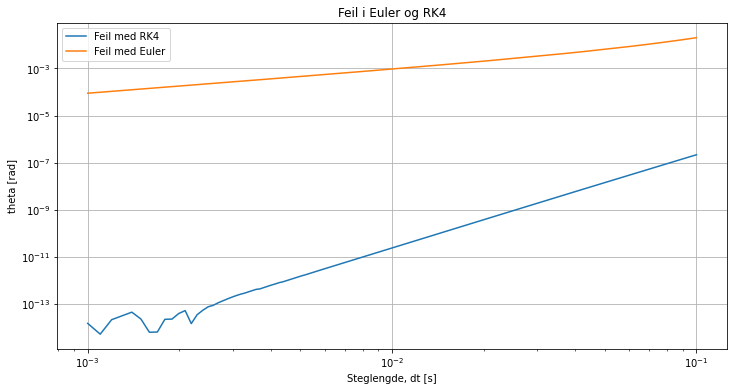

In [14]:
# Plotter feilene
plotter(dt_vals, [error_vals_RK4, error_vals_euler], "Feil i Euler og RK4", "Steglengde, dt [s]", 
    "theta [rad]", 10, ["Feil med RK4", "Feil med Euler"])

Det første vi ser fra plottet er at en kortere steglengde åpenbart medfører en lavere feil i vinkelutslaget, samt at RK4 er betydelig mer presis enn Eulers metode. I tillegg ser vi at de to kurvene tilnærmet er lineære når vi plotter de med logaritmiske akser, og ved å studere stigningen kan vi se resultatet av at RK4 er en 4. ordens metode, mens Eulers er av orden 1. I intervallet fra $10^{-3}$ til $10^{-2}$, det vil si i en tidobling av steglengde, øker feilen i Eulers fra omtrent $10^{-4}$ til $10^{-3}$, det vil si også den tidobles. Feilen er proporsjonal med steglengden, som stemmer for en metode av orden 1. Ved å se på intervallet fra $10^{-2}$ til $10^{-1}$ derimot, ser det ut som stigningen er noe høyere, men dette antar vi skyldes at Eulers metode er såpass upresis for (relativt) høye steglengder at feilen vil øke mer (divergere). Feilen er her i størrelsesorden $10^{-2}$, som er samme størrelse som maksimalt vinkelutslag, og vi må derfor forvente at en økning i steglengde medfører en uproporsjonalt stor økning i feilen.

Tilsvarende, ved å se på intervallet fra $10^{-2}$ til $10^{-1}$ for RK4, ser vi at en tidobling i steglengde medfører en økning på $10^4$ i feilen (fra ca. $10^{-10.5}$ til $10^{-6.5}$), som stemmer for en 4. ordens metode, der $e_n\propto dt^4$. For veldig lave verdier for $dt$ med RK4-metoden ser vi at grafen blir veldig hakkete og flater litt ut, som vi antar skyldes at feilen blir såpass liten at en datamaskin ikke klarer å representere den helt riktig. Dette viser imidlertid at det for RK4-metoden ikke er noe særlig poeng i å ha en steglengde mindre enn $dt=0.01$, siden det er begrenset hvor liten feilen kan bli.

## Svingninger med fritt massesenter
### Oppgave 2)

#### a)
For å studere skipet med flere implementerte krefter, må flere variable inkluderes i vår definisjon av $\vec{w}(t)$. Vi tar med massesenterets x- og y-koordinat, samt tilhørende hastighetskomponenter, slik at vi får

$$
\vec{w}(t) = \left[\theta(t)\hskip1em \omega(t)\hskip1em x_c(t)\hskip1em y_c(t)\hskip1em v_x(t)\hskip1em v_y(t) \right]^T
$$

I den nye funksjonen for det koblede systemet, `f_koblet`, henger Newtons andre lov for translasjon og rotasjon sammen, siden translasjonsliningen $\Sigma\textbf{F}=m\frac{d^2\textbf{R}}{dt^2}$ avhenger av oppdriftskraften, som igjen er avhengig av vinkelutslaget. Vi ser fortsatt bort ifra alle krefter i x-retning, og systemet med ODE-er blir dermed

$$
(\text{I})\hskip1emF_B+F_G=m \frac{dv_y}{dt}\Rightarrow F_B-mg=m\frac{dv_y}{dt}\Rightarrow \frac{dv_y}{dt}=\frac{F_B}{m}-g
$$
$$
(\text{II})\hskip1em \tau_B=I_c\frac{d\omega}{dt}\Rightarrow F_Bh\sin\theta=I_c\frac{d\omega}{dt}\Rightarrow \frac{d\omega}{dt}=-\frac{F_Bh\sin\theta}{I_c}
$$

Som vi ser i likning $(\text{I})$, er ikke lenger summen av alle krefter i y-retning lik 0, og vi kan derfor forvente at skipet beveger seg opp og ned i en slags duppebevegelse. Dette skyldes at vi lar arealet nedsunket i vann, $A$, variere, som medfører en oppdriftskraft som vil variere harmonisk. Tilsvarende vil også likning $(\text{II})$ påvirkes av dette, slik at vi burde se en liten endring i vinkelutslaget med implementasjonen av `f_koblet`.

In [15]:
def f_koblet(t, w):
    # Definerer konstanter som er avhengig av vinkelutslag og/eller utslag i y-retning.
    delta_y_C = w[3] - y0_C
    gamma = 2*np.arccos(np.cos(beta/2)-4/(3*np.pi) * (1-np.cos(w[0])) + delta_y_C/R)
    A = 0.5*R**2 *(gamma - np.sin(gamma))

    # Finner krefter og dreiemoment
    F_B = A*sigma0*g
    tau_B = -F_B*h*np.sin(w[0])

    #Sjekker om skipet har kantret (oppg. c)
    if (np.abs(w[0]) > (np.pi-gamma)/2):
        dw = np.zeros(len(w))  # Ved kantring er endringen i alle variable 0
        return dw

    # Returnerer dw
    dw = np.array([w[1]       ,   # dtheta
                   tau_B / I_c,   # domega
                   w[2],          # dx
                   w[5],          # dy
                   w[4],          # dv_x
                   F_B/m-g])      # dv_y
    return dw

#### b)
Vi plotter vinkelutslaget og massesenterets y-verdi som funksjoner av tiden med startvinkel $\theta(t=0)=20^{\circ}$.

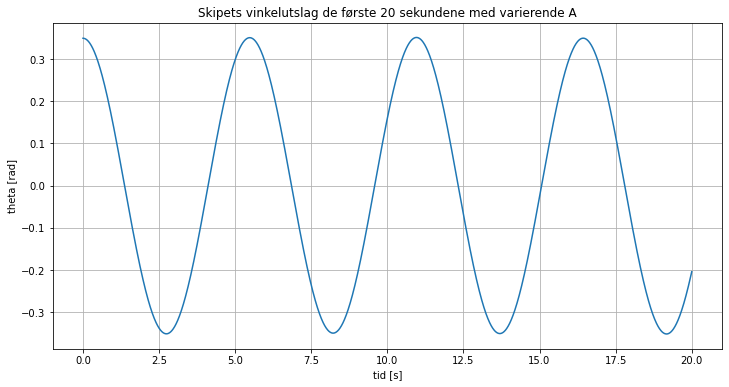

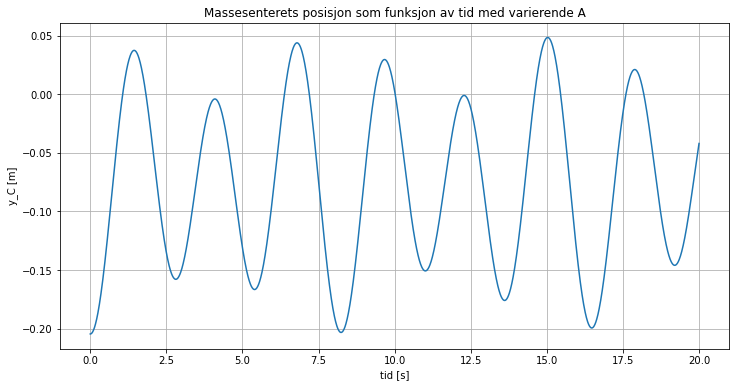

Startverdi = 20 grader
Største utslagsverdi for theta: 20.12 grader


In [16]:
dt = 0.01
t0 = 0
tend = 20
w0 = np.array([np.radians(20), 0,0, y0_C,0,0])

tid0 = time.time()
t, w = ode_solver(f_koblet, t0, tend, w0, dt, method=RK4)
tid1 = time.time()

plotter([t], [w], "Skipets vinkelutslag de første 20 sekundene med varierende A", "tid [s]", "theta [rad]", 0)
plotter([t], [w], "Massesenterets posisjon som funksjon av tid med varierende A", "tid [s]", "y_C [m]", 3)

print(f"Startverdi = 20 grader")
print(f"Største utslagsverdi for theta: {np.degrees(np.max(np.abs(w[:,0]))):.2f} grader")

I plottet av $y_c$ ser vi som forventet at skipet dupper opp og ned som følge av at vi lar arealet nedsunket i vann variere. Vinkelutslaget ser ut til å variere med tiden på samme måte som i tidligere oppgaver, som gir mening siden endringen i y er relativt lav, kun ca. 0.2 meter på det meste. Samtidig fant vi at differansen mellom startvinkelen og maksimalutslaget var så lav som 0.12 grader, som tyder på at vinkelutslaget ikke lar seg påvirke stort av den lille duppebevegelsen. Fra oppgave 1h, der vi blant annet studerte presisjonen til RK4, vet vi at feilen i metoden er såpass liten at den ikke kan ha påvirket resultatet.

### Kantring

#### c)
Skipet kantrer dersom $\theta>\frac{\pi-\gamma}{2}$. Vi implementerer dette ved å legge til en if-setning i `f_koblet` som sjekker for dette kriteriet, og returnerer et array med 0 for å indikere at skipet ikke skal bevege seg noe mer. I tillegg setter vi en if-setning i `ode_solver` som sjekker om det returnerte arrayet $\vec{w}$ fra RK4 er identisk med det forrige, som betyr at skipet ikke beveger seg. Isåfall oppdateres alle verdier i $\vec{w}$ til 0 bortsett fra $\theta$, som settes til $\pm\frac{\pi}{2}$ ettersom hvilken side skipet kantret på.

For å finne minste verdi for $\omega(t=0)$ som fører til kantring når $\theta(t=0)=0$, er det lite hensiktsmessig å iterere gjennom alle $\omega_{0}$-verdier i et intervall. Dette skyldes at vi må kalle på `ode_solver` hver gang vi tester en ny initialverdi, og for at kjøretiden ikke skal bli for lang må dette isåfall gå på bekostning av hvor presist vi får beregnet $\omega_0$. En bedre måte å løse problemet er heller å starte med et stort intervall, $\omega_{0}\in[\omega_{0,min},\hskip0.2em \omega_{0,max}]$, sjekke om skipet har veltet i et punkt innenfor dette intervallet, og deretter redusere intervallstørrelsen. Dette gjør vi ved å bruke halveringsmetoden, der vi sjekker om skipet kantrer med $\omega_{0} =\frac{\omega_{0,max}-\omega_{0,min}}{2}$, og setter intervallets maksimum (minimum) lik midtverdien hvis den kantrer (ikke kantrer). Intervallet halveres dermed for hver iterasjon, slik at vi oppnår konvergens mye raskere enn ved å iterere gjennom alle verdier i intervallet.

In [17]:
def halveringsmetoden(f, omega_min, omega_maks, tol=1.e-6, maks_iter = 30, printer = True):
    '''
    Input:
        f:                      Funksjon
        omega_min, omega_maks:  Startintervall 
        tol :                   Toleranse i usikkerhet
        max_iter:               Maks antall iterasjoner
    Output:
        Siste omega0-verdi, antall iterasjoner
    '''

    w0_min = np.array([0, omega_min, 0, y0_C, 0, 0])
    w0_maks = np.array([0, omega_maks, 0, y0_C, 0, 0])
    t, w_min = ode_solver(f, t0, tend, w0_min, dt, method=RK4)
    t, w_maks = ode_solver(f, t0, tend, w0_maks, dt, method=RK4)
    
    for k in range(maks_iter):
        omega0_midt = 0.5*(w_min[0][1]+w_maks[0][1])
        w0_midt = np.array([0, omega0_midt, 0, y0_C, 0, 0])                 # Midtpunkt
        t, w_midt = ode_solver(f, t0, tend, w0_midt, dt, method=RK4)                
        if printer:
            print(f"k ={k:3d}, omega_min = {w_min[0][1]:.6f}, omega_maks = {w_maks[0][1]:.6f}, omega_midt = {w_midt[0][1]:.6f}")
        if (w_maks[0][1]-w_min[0][1]) < 2*tol:     # Ønsket nøyaktighet er oppnådd
            break
        elif np.abs(w_midt[-1][0]) ==  np.pi/2:    # Minste omega0 før kantring er mellom w_min og w_midt
            w_maks = w_midt
        else:                                      # Minste omega0 før kantring er mellom w_midt og w_maks
            w_min = w_midt
    if not printer:
        print(f"k ={k:3d}, omega_min = {w_min[0][1]:.6f}, omega_maks = {w_maks[0][1]:.6f}, omega_midt = {w_midt[0][1]:.6f}")
    return w_midt, k

Setter startintervall $\omega_0\in[0,\hskip.2em1] \text{ rad/s}$, og kjører koden.

In [18]:
omega0_min = 0
omega0_maks = 1

w, k = halveringsmetoden(f_koblet,omega0_min, omega0_maks)

k =  0, omega_min = 0.000000, omega_maks = 1.000000, omega_midt = 0.500000
k =  1, omega_min = 0.000000, omega_maks = 0.500000, omega_midt = 0.250000
k =  2, omega_min = 0.250000, omega_maks = 0.500000, omega_midt = 0.375000
k =  3, omega_min = 0.375000, omega_maks = 0.500000, omega_midt = 0.437500
k =  4, omega_min = 0.375000, omega_maks = 0.437500, omega_midt = 0.406250
k =  5, omega_min = 0.406250, omega_maks = 0.437500, omega_midt = 0.421875
k =  6, omega_min = 0.421875, omega_maks = 0.437500, omega_midt = 0.429688
k =  7, omega_min = 0.429688, omega_maks = 0.437500, omega_midt = 0.433594
k =  8, omega_min = 0.429688, omega_maks = 0.433594, omega_midt = 0.431641
k =  9, omega_min = 0.429688, omega_maks = 0.431641, omega_midt = 0.430664
k = 10, omega_min = 0.430664, omega_maks = 0.431641, omega_midt = 0.431152
k = 11, omega_min = 0.431152, omega_maks = 0.431641, omega_midt = 0.431396
k = 12, omega_min = 0.431396, omega_maks = 0.431641, omega_midt = 0.431519
k = 13, omega_min = 0.431

Vi finner altså at $\omega(t=0) \approx 0.431613 \text{ rad/s}=24.7296^{\circ}/s$ er laveste verdi for $\omega_0$ som fører til at båten kantrer. Vi satte toleransen til $10^{-6}$ fordi vi føler dette gir en tilstrekkelig nøyaktig måling av vinkelhastigheten, samtidig som det lar oss se fordelen med å bruke halveringsmetoden.

Til sammenlikning brukte halveringsmetoden 19 iterasjoner, mens vi på samme intervall måtte brukt over 400'000 dersom vi skulle iterert gjennom hver mulige verdi for $\omega_0$ fram til skipet kantret, med nøyaktighet $10^{-6}$.

### Implementering av last

#### d)

Vi utvider nå vår skipsmodell til at skipet skal kunne bære last på dekk. Denne lasten modelleres som en punktpartikkel med masse $m_L$, og vil kunne bevege seg friksjonsfritt langs dekket. Den totale massen til skipet er nå endret fra $m$ til $m+m_L$, og vi må derfor beregne likevektsvinkelen, $\beta$, og arealet nedsunket i vann ved likevekt, $A_0$, på nytt. Disse størrelsene regnes ut på lik måte som i oppgave 1 med den nye verdien for skipets totale masse. 

For å beregne lastens posisjon og hastighet oppretter vi et endimensjonalt koordinatssystem med origo i metasenteret og aksen parallelt med skipets dekk. Lastens posisjon relativt til origo kaller vi for $s_L(t)$, og vil være  en positiv (negativ) verdi for en posisjon til høyre (venstre) for metasenteret. Videre innfører vi lastens hastighet $v_L(t)$, og legger begge disse to til i vår vektor $\vec{w}(t)$. For å kunne løse vår differensialligning med våre nye størrelser, må vi finne utrykk for både  $\frac{ds_L(t)}{dt}$ og  $\frac{dv_L(t)}{dt}$. Vi anerkjenner at  $\frac{ds_L(t)}{dt} = v_L(t)$, og ser nærmere på  $\frac{dv_L(t)}{dt}$; lastens akselerasjon. Newtons 2. lov gir oss følgende uttrykk
 $$
 \Sigma F = m_L\frac{dv_L(t)}{dt}
 $$
 
 Vi må derfor finne kreftene som virker på lasten; mer spesifikt krefter som virker i fartsretningen. Ettersom vi har antatt friksjonsfritt underlag, og normalkraften alltid vil stå normalt på fartsretningen, vil bare tyngdekraften $F_G = m_Lg$ kunne bidra til å endre lastens hastighet. Vi vil derfor få følgende utrykk
 
  $$
 \Sigma F = - m_Lg sin(\theta) =  m_L\frac{dv_L(t)}{dt}
 \Rightarrow \frac{dv_L(t)}{dt} = - g  sin(\theta)
 $$
 
 
Her får vi et negativt fortegn fordi når skipet roteres om massesenteret med $\theta$ grader, vil dette føre til en akselerasjon i motsatt retning av vinkelutslaget. 
 
Implementering av last vil også endre på treghetsmomentet og det totale dreiemomentet til skipet. Ettersom vi har antatt at vår last er en punktmasse, kan vi ta i bruk at $ I = \Sigma m r^2 $. Vi finner et uttrykk for avstanden r fra massesenteret til lasten ved å bruke at avstanden fra massesenteret til metasenteret er lik h, mens avstand fra metasenteret til lasten er $s_L(t)$, hvor h og $s_L(t)$ står ortogonalt på hverandre. Dette gir oss følgende uttrykk for det nye treghetsmomentet

$$
I = I_{skip} + I_{last}
$$
$$
I = \frac{1}{2}mR^2 \cdot\left(1-\frac{32}{9\pi^2}\right) + m_L (h^2+s_L(t)^2) 
$$



For dreiemomentet $\tau_L$ har vi at $\tau_L = - m_Lgcos(\theta) s_L(t)$. Dette gir oss følgende uttrykk for $\frac{d\omega}{dt}$, hvor $F_B$ er oppdriftskraften på skipet.

$$
\frac{d\omega}{dt} = \Sigma \tau = \tau_B + \tau_L = \frac{-F_Bh\sin(\theta) - m_Lgcos(\theta) s_L(t) }{I_c}
$$



Vi implementerer nå en ny funksjon som vi kaller `f_koblet_last` som inneholder de nye uttrykkene. Merk at denne funksjonen tar inn en utvidet vektor $\vec{w}(t)$, slik vist under. Her er de to siste elementene i vektoren henholdsvis lastens posisjon og fart.

$$
\vec{w}(t) = \left[\theta(t)\hskip1em \omega(t)\hskip1em x_c(t)\hskip1em y_c(t)\hskip1em v_x(t)\hskip1em v_y(t)\hskip1em s_L(t)\hskip1em v_L(t)\right]^T
$$

Dersom $|s_L(t)| > R$ skal lasten falle av skipet, og dermed ikke lenger påvirke skipets dynamikk. Måten vi representerer dette numerisk er ved å sette $m_L = 0$ dersom dette kriteriet er oppfylt (se i koden for differensialløseren for eksakt implementering). Vi utvider også funksjonen vår slik at vi tar inn den relative størrelsen $\frac{m_L}{m}$, som vi nå kaller for `frac`. Med disse nye utvidelsene kan vi nå simulere bevegelsene til skipet vårt med last på dekk.



In [19]:
def f_koblet_last(t, w):
    d_sL = w[7]
    d_vL = - g * np.sin(w[0])
    
    m_tot = m + ml

    Ic = 0.5*m*(R**2)*(1-32/(9*(np.pi)**2)) + ml * (h**2 + w[6]**2)
    sigma = m_tot/As
    beta = fikspunkt(b, 2*np.pi/3, 1.e-9, 100)

    # Definerer konstanter som er avhengig av vinkelutslag og/eller utslag i y-retning.
    delta_y_C = w[3] - y0_C
    gamma = 2*np.arccos(np.cos(beta/2)-4/(3*np.pi) * (1-np.cos(w[0])) + delta_y_C/R)
    A = 0.5*R**2 *(gamma - np.sin(gamma))

    # Finner krefter og dreiemoment
    F_B = A*sigma0*g
    F_L_x = ml * g * np.cos(w[0]) * np.sin(w[0])
    F_L_y = - ml * g * (np.cos(w[0]))**2
    F_tot_y = F_L_y + F_B
    F_tot_x = F_L_x

    tau_B = -F_B*h*np.sin(w[0])
    tau_L = -ml *g * np.cos(w[0]) * w[6]
    tau_tot = tau_B + tau_L

    #Sjekker om skipet har kantret (oppg. c)
    if (np.abs(w[0]) > (np.pi-gamma)/2):
        dw = np.zeros(len(w))  # Ved kantring er endringen i alle variable 0
        return dw

    # Returnerer dw
    dw = np.array([w[1]       ,      # dtheta
                   tau_tot / I_c,    # domega
                   w[2],             # dx
                   w[5],             # dy
                   F_tot_x,          # dv_x
                   F_tot_y/m-g,      # dv_y
                   d_sL,             # ds_L
                   d_vL])            # dv_L      
    return dw


Nå som vi har implementert `f_koblet_last()`, bruker vi vår tidligere etablerte plottefunksjon `plotter` med verdier av `frac` på henholdsvis 0,001 og 0,08. Vi har valgt å representere at lasten har falt av skipet med at lastens posisjon holdes konstant til skipets radius. Dette kan tydelig gjenkjennes i figurene våre ettersom det vil produsere en knekk i grafen vår.

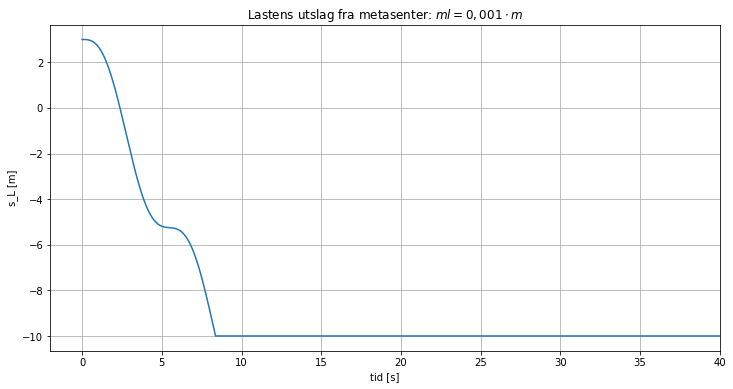

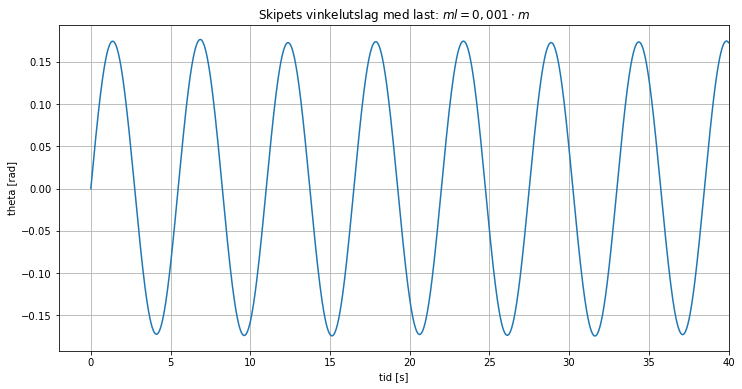

In [20]:
w0 = np.array([0,0.2,0, y0_C,0,0,3.0,0])

frac = 0.001                           # Lastens masse (frac*m_skip)
t, w = ode_solver(f_koblet_last, 0, 40, w0, dt, [frac,False,False], method=RK4)

plotter([t], [w], f"Lastens utslag fra metasenter: $ml = 0,001 \cdot m$", "tid [s]", "s_L [m]", 6, xmax = 40)
plotter([t], [w], f"Skipets vinkelutslag med last: $ml = 0,001 \cdot m$", "tid [s]", "theta [rad]", 0, xmax = 40)

Fra det første plottet kan vi lese av av lasten faller av skipet etter rundt 8 sekunder. Ettersom lastens vekt ikke utgjør en stor del av totalvekten til skipet, vil lastens posisjon på dekk ikke ha stor innvirkning på skipets dynamikk. Dette gjenspeiler seg i vårt plot av skipets vinkelutslag, hvor vi ikke ser en betydelig endring i hvordan skipet krenger etter lasten har falt av. Vi øker nå lastens vekt til $m_L = 0.08 \cdot m$, og genererer tilsvarende plots. 

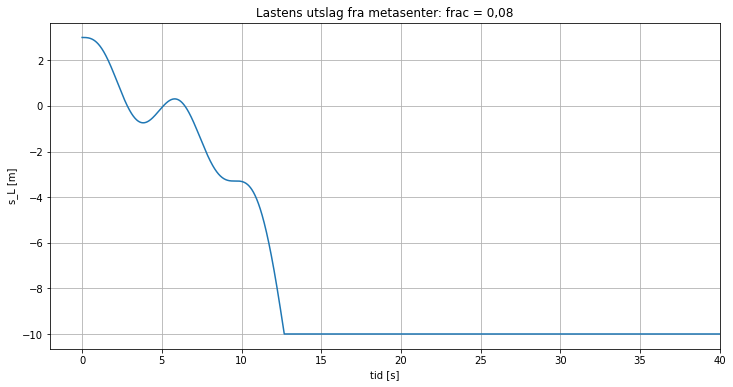

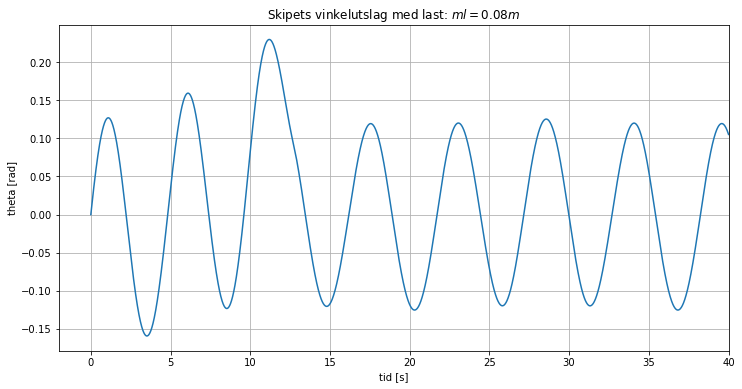

In [21]:
w0 = np.array([0,0.2,0, y0_C,0,0,3.0,0])

frac = 0.08
t, w = ode_solver(f_koblet_last, 0, 40, w0, dt, [frac,False,False], method=RK4)

plotter([t], [w], "Lastens utslag fra metasenter: frac = 0,08", "tid [s]", "s_L [m]", 6, xmax = 40)
plotter([t], [w], f"Skipets vinkelutslag med last: $ml = 0.08 m$", "tid [s]", "theta [rad]", 0, xmax = 40)

Fra det første plottet kan vi se at lasten faller av skipet etter litt under 13 sekunder. Imotsetning til vår første verdi for $m_L$, ser vi nå at lasten har en helt tydelig innvirkning på skipets bevegelsesdynamikk, og at skipet går tilbake til "vanlig" bevegelse etter lasten har falt av.

#### e)
Vi ønsker nå å modellere at skipet vårt har et gjerde langs kanten som holder lasten på dekk. Dersom $|s_L(t)|$ > R skal hastigheten nå settes til null, og lastens posisjon settes slik at $s_L(t)  \pm R$, avhengig av hvilken side av båden gjerde er på. Se i koden for differensialløseren, `ode_solver`, for eksakt implementering. Vi gjenskaper plottene i forrige oppgave, nå med gjerde på skipet.

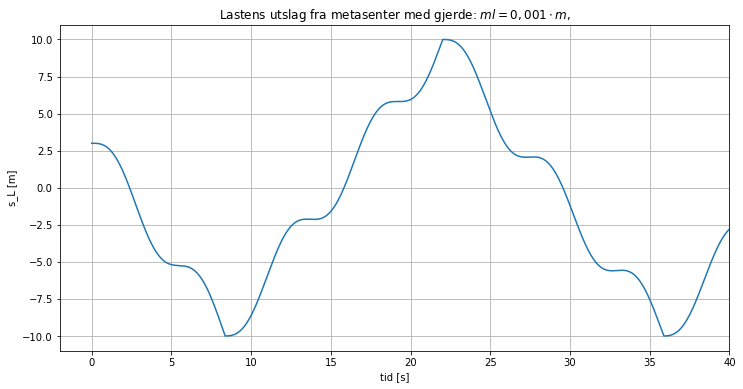

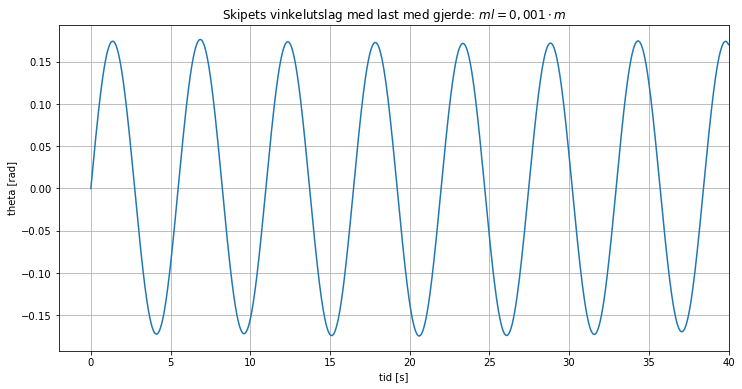

In [22]:
w0 = np.array([0,0.2,0, y0_C,0,0,3.0,0])

frac = 0.001   # Lastens masse (frac*m_skip)
t, w = ode_solver(f_koblet_last, 0, 40, w0, dt, [frac,True,False], method=RK4)

plotter([t], [w], f"Lastens utslag fra metasenter med gjerde: $ml = 0,001 \cdot m$,", "tid [s]", "s_L [m]", 6, xmax = 40)
plotter([t], [w], f"Skipets vinkelutslag med last med gjerde: $ml = 0,001 \cdot m$", "tid [s]", "theta [rad]", 0, xmax = 40)

Som vi ser fra det første plottet ovenfor er det tydelig at lasten nå holder seg på skipets dekk, og ikke faller av. Men som diskutert i forrige oppgave, er ikke lasten med denne vekten betydningsfull for skipsdynamikken, og vi ser derfor liten forskjell på skipets krenging med og uten gjerde. 

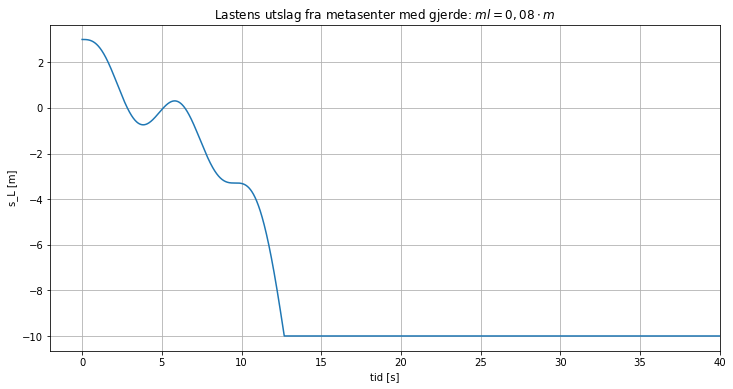

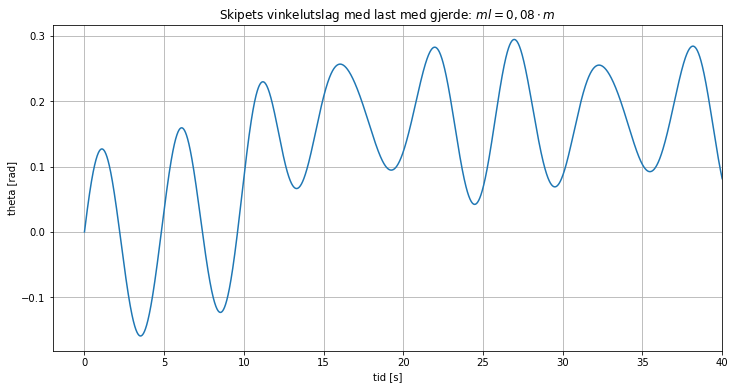

In [23]:
w0 = np.array([0,0.2,0, y0_C,0,0,3.0,0])

frac = 0.08                           # Lastens masse (frac*m_skip)
t, w = ode_solver(f_koblet_last, 0, 40, w0, dt, [frac,True,False], method=RK4)

plotter([t], [w], f"Lastens utslag fra metasenter med gjerde: $ml = 0,08 \cdot m$", "tid [s]", "s_L [m]", 6, xmax = 40)
plotter([t], [w], f"Skipets vinkelutslag med last med gjerde: $ml = 0,08 \cdot m$", "tid [s]", "theta [rad]", 0, xmax = 40)

Fra vårt første plot, ser vi nå at vår last etter en viss tid blir permanent liggende inntil det ene gjerde. (Dette er IKKE en representasjon av at lasten har falt av skipet, selv om plottet blir likt som tilsvarende plot for samme vekt uten gjerde i forrige oppgave.) Denne nye vektfordelingen gjør nå at skipet har et nytt likevektspunkt for $\theta$, hvor det ser ut som skipet fluktuerer rundt en verdi $\theta_{likevekt} \approx 0.17 \text{ rad}$. Skipet heller nå i gjennomsnitt med cirka 10 grader når lasten ligger helt inntil gjerdet. Det er altså svært viktig for skipets stabilitet at lasten ikke er for stor i forhold til skipets masse. En for massiv last vil kunne føre til ubalanse i skipet, og i verste fall føre til at skipet kantrer.

### Friksjon mellom vann og skip
#### f)

Når skipet krenger i vannet vil det virke friksjon mellom skipets overflate og vannet. Til nå har vi sett bort fra denne kraften, men med en forenklet modell burde systemet vårt bli endel mer realistisk. Vi antar at angrepspunktet alltid er i punktet på skipet som er lengst under vann, $D$ på Figur 1. Det kan da vises at armen (vertikal avstanden fra dette punktet til massesenteret) blir

$$
\begin{aligned}
Y_{CD} = y_c - R(\cos\gamma/2-1)
\end{aligned}
$$

Slik vi modellerer friksjonskraften er den proporsonal med arealet av skipet som er i kontakt med vann. Dette kan beskrives lett som $R\gamma$. I tillegg antar vi friksjonskraften er proporsjonal med vinkelhastigheten til skipet $\omega$, i tillegg til en friksjonskoeffisient $k_f$. Oppsummert blir vår modell av friksjonen

$$
\begin{aligned}
F_f =& -k_f R \gamma \omega
\end{aligned}
$$

$$
\begin{aligned}
\tau_f =& -k_f R \gamma \omega (y_c - R(\cos\gamma/2-1))
\end{aligned}
$$

I tillegg til en friksjon er farvannet til skip sjeldent stille. En mer virkelighetsnær modell vil derfor inkludere eventuelle bølger eller vind. Vår modell er svært forenklet, da vi kun ser på bølger og vind som én type pådriverkraft. Når båten roterer vil den naturligvis selv lage bølger, med dette ser vi bort fra. En harmonisk pådriverkraft beskrives som

$$
\begin{aligned}
F_\omega = F_0 \cos \omega_\omega t
\end{aligned}
$$

hvor $F_0$ er ampiltuden til den harmoniske kraften og $\omega_\omega$ er vinkelfrekvensen. Vi antar kraften virker i vannlinjen, slik at armen bare blir $y_C$. Med andre ord blir dreiemomentet fra den harmoniske kraften om en akse gjennom massesenteret

$$
\begin{aligned}
\tau_\omega = F_0 \cos (\omega_\omega t) y_C
\end{aligned}
$$

Med modellene for friksjon og bølger/vind på plass kan vi enkelt endre på `f_koblet()` slik at den inkluderer disse kreftene. Dette gjør vi ved å implementere en ny funksjon `f_koblet_friksjon_bolge()` som regner ut $\frac{d\omega}{dt}$ på følgende vis

$$
\begin{aligned}
\tau_B + \tau_f +\tau_\omega = F_Bh\sin\theta - F_fY_{CD}+F_\omega y_c=I_c\frac{d\omega}{dt}\Rightarrow \frac{d\omega}{dt}=\frac{F_Bh\sin\theta-F_fY_{CD}+F_\omega y_c}{I_c}
\end{aligned}
$$

In [24]:
def f_koblet_friksjon_bolge(t, w):
    """
    Regner ut et steg i odl_løser()
    t: tidspunkt (float)
    w: array med floats (informasjon om system):
       [theta(t), omega(t), x_c(t), y_c(t), v_x(t), v_y(t)]

    returnerer dw: array med endringer i w for tidssteg
    """
    # Definerer konstanter som er avhengig av vinkelutslag og/eller utslag i y-retning.
    delta_y_C = w[3] - y0_C
    gamma = 2*np.arccos(np.cos(beta/2)-4/(3*np.pi) * (1-np.cos(w[0])) + delta_y_C/R)
    Y_CD = w[3] - (R*(np.cos(gamma/2) - 1))
    A = 0.5*R**2 *(gamma - np.sin(gamma))

    # Finner krefter og dreiemoment
    F_B = A*sigma0*g
    F_f = -k_f*R*gamma*w[1]
    F_omega = F_0*np.cos(omega_omega*t)

    tau_B = -F_B*h*np.sin(w[0])
    tau_f = F_f*Y_CD
    tau_omega = F_omega * w[3]

    #Sjekker om skipet har kantret (oppg. c)
    if (np.abs(w[0]) > (np.pi-gamma)/2):
        dw = np.zeros(len(w))  # Ved kantring er endringen i alle variable 0
        return dw

    # Returnerer dw
    dw = np.array([w[1]       ,   # dtheta
                   (tau_B + tau_f + tau_omega) / I_c,   # domega
                   w[2],          # dx
                   w[5],          # dy
                   w[4],          # dv_x
                   F_B/m-g])      # dv_y
    return dw

Først antar vi båten er i rolig farvann (legg også merke til at vi ikke har noe last), slik at vi kan studere friksjonskraften alene. Dette gjør vi ved å sette $F_0 = 0$. $k_f$ er en ukjent konstant, så vi tester for $k_f \in [100, 1000, 10'000, 50'000]$, altså forskjellige størrelsesordner.

/var/folders/k1/pwkc3wn92dv6vxmydy5h23wh0000gn/T/ipykernel_66354/2208782137.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


a: 0.34749943951826057 | b: 0.026517262165048384


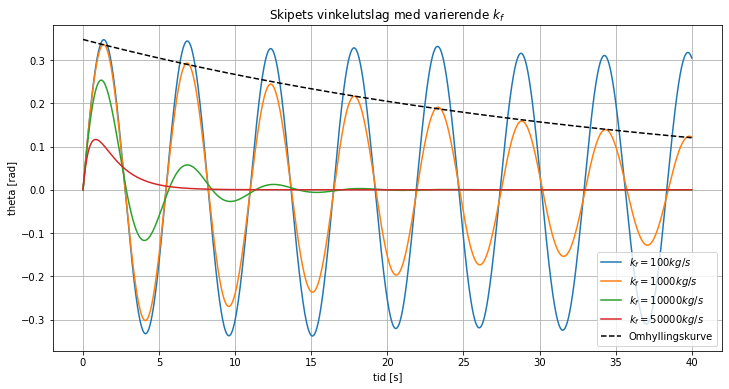

In [25]:
from scipy.optimize import curve_fit

dt = 0.01                                           # tidssteg
t0 = 0                                              # t start
tend = 40                                           # t slutt
w0 = np.array([0, 0.4,0, y0_C,0,0])                 # Initialverdier
omega_0 = np.sqrt(m*g*h/I_c)                        # Skipets egenfrekvens
omega_omega = 0.93*omega_0                          # Harmoniske kraftens vinkelfrekvens
F_0 = 0*m*g                                         # Harmoniske kraftens ampiltude

k_fs = np.array([100, 1000, 10000, 50000]) # Forskjellig størrelsesordner av k_f
legends = []

def monoExp(x, a, b):
    """
    'Grunnfunksjon' for omhyllingskurve
    """
    return a * np.exp(-b * x)

def omhylling(t, w):
    """
    Finner en tilpasset omhyllingskurve gitt tidsarray og w-array.
    Returnerer to arrays: tider og vinkelutslag
    """
    step = 0.25*2*np.pi/(omega_0*dt)               # En kvart periode
    ts = t[int(step)::int(4*step)]                 # Finner tid til toppunkter
    w_max = w[:,0][int(step)::int(4*step)]         # Finner toppunkter
    a, b  = curve_fit(monoExp, ts, w_max)[0]       # Finner konstanter til kurve
    x = np.arange(t0, tend, dt)
    y = monoExp(x, a, b)
    print("a:", a, "| b:", b)
    return x, y

# Plotter for ulike k_f
plt.figure(figsize=(12,6))
for k_f in k_fs:
    t, w = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method=RK4)
    plt.plot(t, w[:,0])
    legends.append(f"$k_f = {k_f} kg/s$")

    # Lager omhyllingskurve for k_f = 1000 kg/s
    if k_f == 1000:
        xx, yy = omhylling(t, w)

plt.plot(xx, yy, "--k")
legends.append("Omhyllingskurve")
plt.title(f"Skipets vinkelutslag med varierende $k_f$")
plt.xlabel("tid [s]")
plt.ylabel("theta [rad]")
plt.legend(legends)
plt.grid()

Fra plottet ovenfor ser vi tydelig at 'små' endringer i $k_f$ har lite å si. Defor er det først og fremst størrelsesordnen som er interessant. For $k_f = 1000 kg/s$ har vi i tillegg tilpasset en omhyllingskurve ved bruk av `curve_fit()` fra scipy.optimize-biblioteket. Et interessant spørsmål er da; når vil båten ligge i ro? Fordi ampiltuden følger en eksponensial avtagning, vil den aldri helt bli null, men vi velger derfor å se på når energien, $E$, er redusert med $95$%. Fra `curve_fit()` får vi at en tilnærmet omhyllingskruve er gitt ved

$$
\begin{aligned}
A(t)=0.3750 e^{-0.02652t}
\end{aligned}
$$

Vi ønsker å finne når $E = 0.05 E_0$. Fordi vi vet at $E \propto A^2$ får vi

$$
\begin{aligned}
\frac{A^2}{A_0^2} = \frac{\left(0.3750 e^{-0.02652t} \right)^2}{\left(0.3750 e^{-0.02652\cdot 0} \right)^2} 
= e^{-2\cdot0.02652t} = 0.05 \implies t \approx 56.5 s
\end{aligned}
$$

Vi har altså funnet ut at når skipet har en friksjonskoeffesient på $k_f = 1000 kg/s$ tar det like under et minutt før $95$% av energien er borte. Når vi ser på demping er også underkritisk, kritisk og overkritisk sentrale begrep. I plottet ovenfor ser vi at $k_f = 10'000 kg/s$ (og de med lavere $k_f$) representerer underkritisk demping, mens $k_f = 50'000$ representerer overkritisk demping. Med andre ord må koeffesienten som gir kritisk demping ligge i intervallet $[10'000, 50'000]$. Vi kan bruke halveringsmetoden til å få en rask pekepinn på hvor $k_{f,kritisk}$ er. Vi ønsker å finne den laveste verdien av $k_f$ som gir at vinkelutslaget aldri blir negativt. Vi er ikke på jakt etter noe eksakt svar, så vi velger å sette $t_{end} = 20$ og $tol = 1$

In [26]:
def halveringsmetoden_demping(f, k_f_min, k_f_max, tol=1, maks_iter = 30):
    """
    Finner k_f som gir kritisk demping
    f: funksjon som regner ut et steg til odl_løser()
    k_f_min: minimumsverdi for k_f
    k_f_max: maxverdi for k_f
    Printer resultater til skjerm
    """
    global k_f
    k_f = k_f_min
    t, w_min = ode_solver(f, t0, tend, w0, dt, method=RK4)
    
    for k in range(maks_iter):
        # Finner midtpunkt og regner ut w-array for denne k_f
        k_f_midt = 0.5*(k_f_min + k_f_max)
        k_f = k_f_midt
        t, w_midt = ode_solver(f, t0, tend, w0, dt, method=RK4)            
        
        print(f"k ={k:3d}, k_f_min = {k_f_min:.1f}," 
        f"k_f_maks = {k_f_max:.1f}, k_f_midt = {k_f_midt:.1f}")

        if abs(k_f_min - k_f_max) < 2*tol:       # Ønsket nøyaktighet er oppnådd
            break
        elif min(w_midt[:,0]) < 0:               # Finnes negativ verdi: demping for svak
            k_f_min = k_f_midt
        else:                                    # Demping for hard
            k_f_max = k_f_midt

dt = 0.01                                           # tidssteg
t0 = 0                                              # t start
tend = 20                                           # t slutt
w0 = np.array([0, 0.4,0, y0_C,0,0])                 # Initialverdier
omega_0 = np.sqrt(m*g*h/I_c)                        # Skipets egenfrekvens
omega_omega = 0.93*omega_0                          # Harmoniske kraftens vinkelfrekvens
F_0 = 0*m*g                                         # Harmoniske kraftens ampiltude
halveringsmetoden_demping(f_koblet_friksjon_bolge, 10000, 50000)

k =  0, k_f_min = 10000.0,k_f_maks = 50000.0, k_f_midt = 30000.0
k =  1, k_f_min = 30000.0,k_f_maks = 50000.0, k_f_midt = 40000.0
k =  2, k_f_min = 40000.0,k_f_maks = 50000.0, k_f_midt = 45000.0
k =  3, k_f_min = 40000.0,k_f_maks = 45000.0, k_f_midt = 42500.0
k =  4, k_f_min = 42500.0,k_f_maks = 45000.0, k_f_midt = 43750.0
k =  5, k_f_min = 42500.0,k_f_maks = 43750.0, k_f_midt = 43125.0
k =  6, k_f_min = 42500.0,k_f_maks = 43125.0, k_f_midt = 42812.5
k =  7, k_f_min = 42500.0,k_f_maks = 42812.5, k_f_midt = 42656.2
k =  8, k_f_min = 42656.2,k_f_maks = 42812.5, k_f_midt = 42734.4
k =  9, k_f_min = 42656.2,k_f_maks = 42734.4, k_f_midt = 42695.3
k = 10, k_f_min = 42695.3,k_f_maks = 42734.4, k_f_midt = 42714.8
k = 11, k_f_min = 42695.3,k_f_maks = 42714.8, k_f_midt = 42705.1
k = 12, k_f_min = 42695.3,k_f_maks = 42705.1, k_f_midt = 42700.2
k = 13, k_f_min = 42700.2,k_f_maks = 42705.1, k_f_midt = 42702.6
k = 14, k_f_min = 42702.6,k_f_maks = 42705.1, k_f_midt = 42703.9
k = 15, k_f_min = 42703.9

Vi ser at kritisk demping befinner seg rundt $k_f \approx 43'000$. Vi tester med et lite plot under, og ser at dette burde stemme ganske bra.

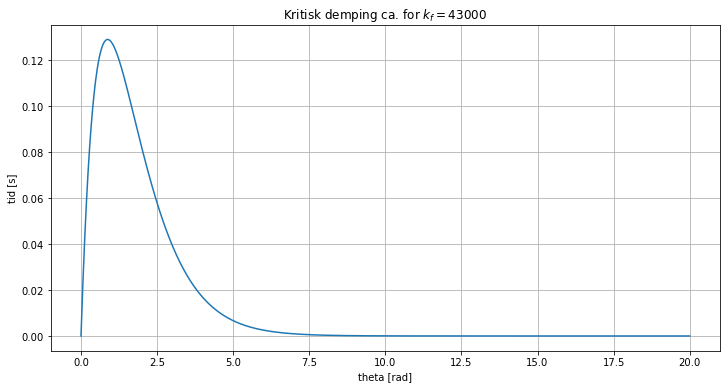

In [27]:
k_f = 43000
t, w = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method=RK4)
plotter([t], [w], f"Kritisk demping ca. for $k_f = ${k_f}", "theta [rad]", "tid [s]", 0)

### Bølger og vind som én harmonisk kraft
#### g)

Nå ønsker vi å se på effekten av den harmoniske kraften (en slags modell av bølger eller vind som forklart tidligere) på skipet. Vi setter $F_0 = 0.625mg$, altså er ampiltuden til kraften $62.5$% av tyngdekraften på skipet. I tillegg settes $\omega_\omega$, vinkelhastigheten til kraften, til $0.93\omega_0$, det vil si tett opptil båtens egenfrekvens, men ikke helt lik. Vi gir skipet en initiell vinkelhastighet på $2^\circ/s$ og lar systemet gå i $240$ sekunder. Friksjonskoeffesienten settes til $100kg/s$ slik at friksjonen ikke får for stor innvirkning på systemet med denne litt lengre tidsskalaen.

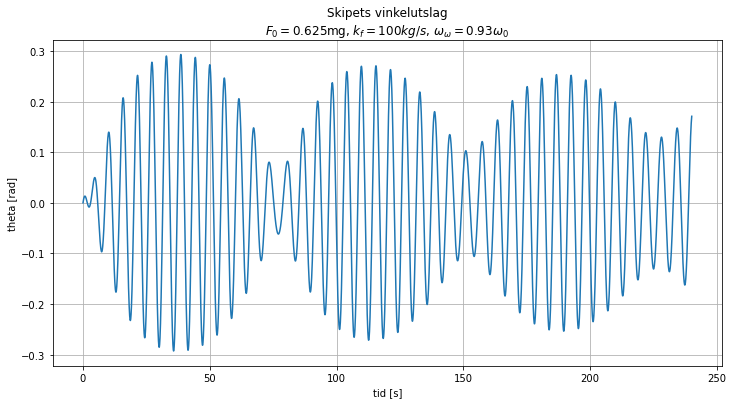

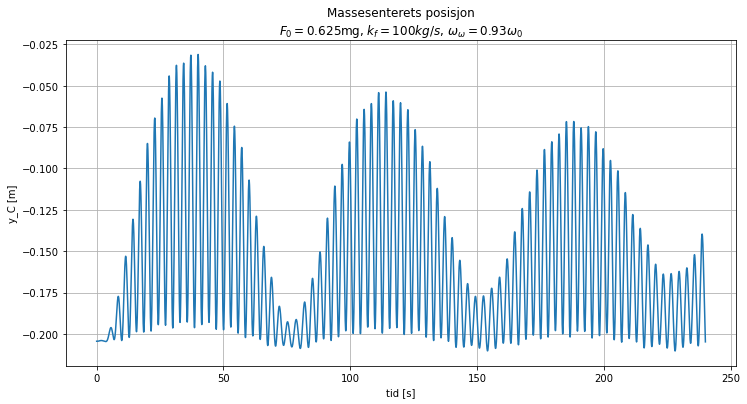

In [28]:
dt = 0.05
t0 = 0
tend = 240
w0 = np.array([0, np.radians(2),0, y0_C,0,0])
k_f = 100                                         # Friksjonskoeffesient
omega_0 = np.sqrt(m*g*h/I_c)                      # Skipets egenfrekvens
omega_omega = 0.93*omega_0                        # Harmoniske kraftens vinkelfrekvens
F_0 = 0.625*m*g                                   # Harmoniske kraftens ampiltude

t, w = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method=RK4)

plotter([t], [w], f"Skipets vinkelutslag\n$F_0 = ${round(F_0/(m*g),3)}mg, " 
    f"$k_f={k_f}kg/s$, $\omega_\omega = {round(omega_omega/omega_0,2)}\omega_0$",
    "tid [s]","theta [rad]", 0)

plotter([t], [w], f"Massesenterets posisjon\n$F_0 = ${round(F_0/(m*g),3)}mg, " 
    f"$k_f={k_f}kg/s$, $\omega_\omega = {round(omega_omega/omega_0,2)}\omega_0$",
    "tid [s]", "y_C [m]", 3)

Av plottene over ser vi tydelig at både vinkelutslaget og massesenterets posisjon varierer periodisk, som forventet. Likevel observerer noe vi ikke har sett før, det virker som om både vinkelutslaget og massesenterets høyde oscillerer på to forskjellige tidsskalaer. En rask tidsskala, akkurat som før, men også en tregere tidsskala. Det er tydelig at pådriverkraften skaper dette fenomenet, kjent som sveving. Sveving er et fenomen som dukker opp når vi har en superposisjon av to bølger med frekvens nær, men ikke lik, hverandre. Dette kan enkelt vises ved å legge sammen to bølger

$$
\begin{aligned}
\sin(\omega_1t)+\sin(\omega_2t)=2\sin\left(\frac{(\omega_1+\omega_2)t}{2}\right)
\cos\left(\frac{(\omega_1-\omega_2)t}{2}\right)
\end{aligned}
$$

hvor vi har brukt enkelte trigonometriske identiteter. I vårt tilfellet har skipet en egenfrekvens $\omega_0$. I plottene ovenfor har bølge/vind-kraften vinkelfrekvens $0.93\omega_0$. Det vil si at

$$
\begin{aligned}
\frac{(\omega_1+\omega_2)}{2}
\end{aligned}
$$

er den raske vinkelhastigheten vi observerer at skipet svinger med. Mens

$$
\begin{aligned}
\frac{(\omega_1-\omega_2)}{2}
\end{aligned}
$$

er den trege svevehastigheten. Vi kan derfor enkelt regne oss frem til sveveperioden. Fordi vi har satt $\omega_\omega = 0.93\omega_0$ er det eneste vi trenger er egenfrekvensen til skipet.

$$
\begin{aligned}
T=\frac{1}{f}=\frac{2\pi}{\omega}=\frac{4\pi}{\omega_0-\omega_\omega}
=\frac{4\pi}{\omega_0-0.93\omega_0} =\frac{400\pi}{7\omega_0}
\end{aligned}
$$

In [29]:
omega_0 = np.sqrt(m*g*h/I_c)
T_sveve = (400*np.pi)/(7*omega_0)
print("Sveveperiode:", round(T_sveve, 2), "sekunder")

Sveveperiode: 157.35 sekunder


Hvis vi forsøker å lese av perioden fra plottene, er det ikke så lett å få det nøyaktig, men der ser ca. $157$ sekunder ser absolutt ut til å stemme.

### Nøyaktighet og kjøretid - Bogacki-Shampines metode vs RK4
#### h)

For en leser uten forkunnskaper, kan den standard Runge-Kutta metoden virke overlegen etter denne rapporten. Det er dog viktig å nevne at konkurransen så langt ikke har vært helt rettferdig. Til nå har vi kun sammenlignet RK4 med Eulers metode, som er den aller mest grunnleggende måten å løse ODE'er på. Det finnes mange andre metoder vi kan sammenlikne med som gir et mer realistisk bilde av hvor RK4 hører hjemme. Det finnes for eksempel 8. ordens Runge-Kutta metoder, og i tillegg finnes det implisitte metoder som kan løse stive ODE'er. De ODE'ene vi har løst her lar seg likevel løse fint med den standard Runge-Kutta metoden som er eksplisitt, så vi jobber ikke med et stivt problem. Som vi også tidligere har sett er feilen i RK4 så liten at det ikke har noe betydelig innvirkning på vårt problem. Derfor vil ikke implisitte eller høyere ordens metoder hjelpe noe nevneverdig. En ulempe med RK4 er at vi må gjøre 4 funksjonsevalueringer for hvert steg, det er her Bogacki–Shampine (herfra kalt BS) metoden kommer inn i bildet. RK-tablået til BS metoden ser slik ut

$$
\begin{array}{c|cccc}
      0 &  &  &  & \\ \frac{1}{2} &  \frac{1}{2} &  &  & \\ \frac{3}{4} & 0 & \frac{3}{4} &  & \\ 1 &  \frac{2}{9} & \frac{1}{3} & \frac{4}{9} &  \\ \hline & \frac{2}{9} & \frac{1}{3} & \frac{4}{9} & 0
\\ & \frac{7}{24} & \frac{1}{4} & \frac{1}{3} & \frac{1}{8}
    \end{array}
$$

(se https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Explicit_Runge%E2%80%93Kutta_methods for nærmere forklaring om Runge-Kutta metoder og tablå)

Det essensielle å trekke ut fra tablået til BS metoden er 0'en på første rad og 0'en i siste kolonne på nest nederste rad. Uten å gå noe dypt inn i RK-tablåer betyr dette at vi kun trenger 3 funksjonsevalueringer istedenfor 4. Fordi disse tallene er 0 vil siste evaluering i ett steg være lik den første i neste steg. På denne måten burde metoden gå raskere, spesielt hvis man jobber på større tidsskalaer.

BS metoden slår likevel ikke RK4 på alle områder. BS er en 3. ordens metode, mens RK4 er av 4. orden. Det vil si at den lokale feilen for BS er av orden $O(h^3)$ (hvor h er steglengden), mens den er $O(h^4)$ for RK4. Dermed vil feilen, med samme steglengde, bli større for BS. Med formålene i vårt prosjekt vil derimot feilen være helt akseptabel med en 3.ordens metode.

I cellen under implementerer vi BS metoden. Merk at vi da også har lagt inn en betingelse i `ODE_solver()` slik at vi får full utnyttelse av first same as last (FSAL).

In [30]:
def bogshamp(f, t0, y0, h0, k_old):
    
    k1 = k_old
    k2 = f(t0 + 0.5*h0, y0 + 0.5*h0*k1)
    k3 = f(t0 + 0.75*h0, y0 + 0.75*h0*k2)
    y_next = y0 + (1/9)*h0*(2*k1 + 3*k2 + 4*k3)
    k4 = f(t0 + h0, y_next)
    
    x_next = t0 + h0
    
    return x_next, y_next, k4

In [31]:
dt = 0.05
t0 = 0
tend = 1000
w0 = np.array([0, np.radians(2),0, y0_C,0,0])
k_f = 100
omega_0 = np.sqrt(m*g*h/I_c)
omega_omega = 0.93*omega_0
F_0 = 0.625*m*g

time0 = time.time()
t, w_RK = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method=RK4)
print(f"Metode: Runge-Kutta 4\nSteg: {tend/dt}\nTid:", round(time.time() - time0, 2))
print("-----------------------")
time0 = time.time()
t, w_BS = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method = bogshamp, betingelser=[0,False,True])
print(f"Metode: Bogacki–Shampine\nSteg: {tend/dt}\nTid:", round(time.time() - time0, 2))

Metode: Runge-Kutta 4
Steg: 20000.0
Tid: 1.83
-----------------------
Metode: Bogacki–Shampine
Steg: 20000.0
Tid: 1.53


Vi har nå også testet kjøretid for de to ulike metodene ved å se på et system fra $t_0 = 0$ til $t_{end} = 1000$ med $dt = 0.05$. Vi ser at BS-metoden er merkbart raskere i dette tilfellet og bruker ca. $80$% av tiden RK4 bruker. Merk at vi her ikke har implementert en adaptiv ode-løser, så steglengden er alltid den samme.

Vi sjekker nå også feilen i BS sammenlignet med Euler og RK4.

In [32]:
w0 = np.array([0.01,0])
t0 = 0
tend = 20

theta_analytisk = f_analytisk(20)

dt_vals = np.linspace(0.001, 0.1, 100)
error_vals_RK4 = []#np.zeros(len(dt_vals))
error_vals_euler = []#np.zeros(len(dt_vals))
error_vals_BS = []

# Finner numeriske løsninger og legger til feilen i et array
for i in range(len(dt_vals)):
    dt = dt_vals[i]
    t, w_euler = ode_solver(f_liten_vinkel, t0, tend, w0, dt, method=euler)
    t, w_RK4 = ode_solver(f_liten_vinkel, t0, tend, w0, dt, method=RK4)
    t, w_BS = ode_solver(f_liten_vinkel, t0, tend, w0, dt, method=bogshamp, betingelser=[0, False, True])
    theta_euler = w_euler[-1][0]
    theta_RK4 = w_RK4[-1][0]
    theta_BS = w_BS[-1][0]
    error_euler = abs(abs(theta_euler) - abs(theta_analytisk))
    error_RK4 = abs(abs(theta_RK4) - abs(theta_analytisk))
    error_BS = abs(abs(theta_BS) - abs(theta_analytisk))
    error_vals_euler.append(error_euler)
    error_vals_RK4.append(error_RK4)
    error_vals_BS.append(error_BS)

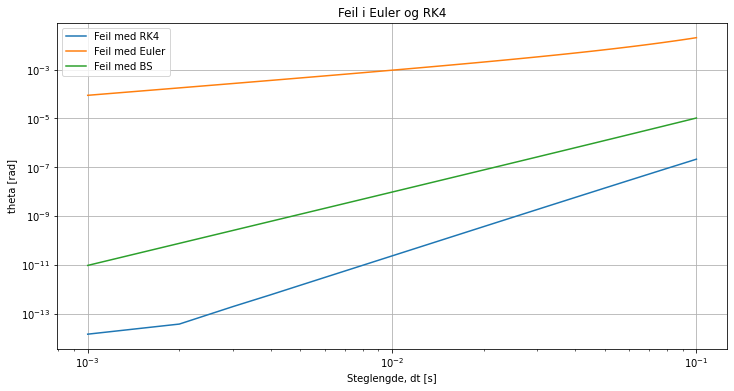

In [33]:
# Plotter feilene
plotter(dt_vals, [error_vals_RK4, error_vals_euler, error_vals_BS], "Feil i Euler og RK4", 
        "Steglengde, dt [s]", "theta [rad]", 10, ["Feil med RK4", "Feil med Euler", "Feil med BS"])

Vi observerer fra plottet at feilen i BS er betydelig høyere, men akkurat som forventet. Når $dt$ øker med en faktor på $100$, øker feilen med en faktor på $10^6$. Dette er akkurat på prediksjonen siden vi jobber med en 3. ordens metode (se tidligere diskusjon om feil).

Selvom differansen i feilen er liten, og neglisjerbar for våre formål, eksisterer det en forskjell. Dette kan vi vise ved å benytte halveringsmetoden til svært nøyaktig (med en feil på $10^{-10}$) å bestemme den initielle vinkelhastigheten som gir kantring. Hvis vi benytter hastigheten vi finner med halvveringsmetoden vil det være mulig at båten kantrer i én simulering, men ikke i en annen når vi benytter samme steglengde og metoder av forskjellig orden.

In [34]:
omega0_maks = 1
dt = 0.01
t0 = 0
tend = 20
k_f = 100
omega_0 = np.sqrt(m*g*h/I_c)
omega_omega = 0.93*omega_0
F_0 = 0.625*m*g

o=halveringsmetoden(f_koblet_friksjon_bolge, omega0_min, omega0_maks, tol = 1.e-10, maks_iter = 40, printer=False)

k = 33, omega_min = 0.446924, omega_maks = 0.446924, omega_midt = 0.446924


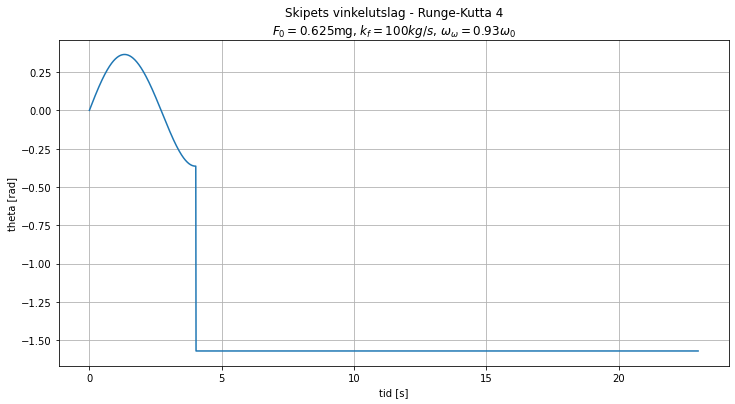

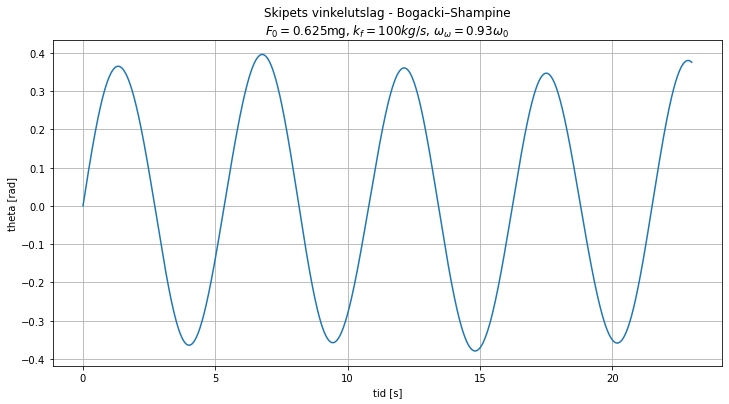

In [35]:
dt = 0.01
t0 = 0
tend = 23
w0 = np.array([0, 0.4469242639,0, y0_C,0,0])
k_f = 100
omega_0 = np.sqrt(m*g*h/I_c)
omega_omega = 0.93*omega_0
F_0 = 0.625*m*g

t, w_RK4 = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method=RK4)
t, w_BS = ode_solver(f_koblet_friksjon_bolge, t0, tend, w0, dt, method = bogshamp, betingelser=[0,False,True])

plotter([t], [w_RK4], f"Skipets vinkelutslag - Runge-Kutta 4\n$F_0 = ${round(F_0/(m*g),3)}mg, " 
    f"$k_f={k_f}kg/s$, $\omega_\omega = {round(omega_omega/omega_0,2)}\omega_0$",
    "tid [s]","theta [rad]", 0)

plotter([t], [w_BS], f"Skipets vinkelutslag - Bogacki–Shampine\n$F_0 = ${round(F_0/(m*g),3)}mg, " 
    f"$k_f={k_f}kg/s$, $\omega_\omega = {round(omega_omega/omega_0,2)}\omega_0$",
    "tid [s]","theta [rad]", 0)

Som vi ser i plottene over kantrer båten når vi benytter RK4, men ikke når vi benytter BS, selv om initialverdiene er helt like. Fordi feilen i BS er større underestimerer den vinkelutslaget noe, slik at båten akkurat ikke kommer over den kritiske vinkelen. Som nevnt er dette neglisjerbart i våre tilfeller, men det illustrerer at det absolutt eksisterer en større feil i BS, som potensielt kan være skjebnesvanger.

### Bølger og skipets egenfrekvens

Nå ønsker vi å studere effekten av bølger med ulike frekvenser. Historien har vist at objekters egenfrekvenser når de blir utsatt for naturkrefter er av stor interesse. Det klassiske eksempelet er Tacoma-brua (https://www.youtube.com/watch?app=desktop&v=3mclp9QmCGs) som kollapset grunnet resonans. Vi har allerede diskutert skipets egenfrekvens og sveving som følge av en harmonisk kraft. Nå ønsker vi å se på en båt som starter helt stille i vannet, og hvor vi setter friksjonskoeffesienten til $0$. Hvis vi implementerer en halveringsmetode som kan finne hvilken $F_0$ (eller nærmere bestemt andelen av $mg$) vi trenger for å få båten til å kantre i løpet av de første $40$ sekundene, kan vi sammenlikne det for bølger med ulike frekvenser. Vi forventer da at frekvenser nær $\omega_0$ krever en mye lavere $F_0$ for å få båten til å kantre. Vi ser på $\omega_\omega = r \cdot \omega_0$ hvor $r \in [0.6, 0.65, 0.7, ..., 1.35, 1.4]$ og plotter resultatene med $\omega_\omega/\omega_0$ langs x-aksen og $F_0/mg$ langs y-aksen.

In [36]:
def halveringsmetoden_F0(f, F0_min, F0_max, tol=0.005, maks_iter = 30):
    """
    Finner F_0 på F_omega som fører til kantring
    f: funksjon som regner ut et steg til ode_solver()
    F0_min: minimumsverdi for ampiltude til harmonisk kraft
    F0_max: maxverdi for ampiltude til harmonisk kraft
    Printer resultater til skjerm
    """
    global F_0
    F_0 = F0_min
    t, w_min = ode_solver(f, t0, tend, w0, dt, method=bogshamp, betingelser=[0,False,True])
    
    for k in range(maks_iter):
        # Finner midtpunkt og regner ut w-array for denne F_0
        F0_midt = 0.5*(F0_min + F0_max)
        F_0 = F0_midt
        t, w_midt = ode_solver(f, t0, tend, w0, dt, method=bogshamp, betingelser=[0,False,True])            

        if abs(F0_min/(m*g) - F0_max/(m*g)) < 2*tol:          # Ønsket nøyaktighet er oppnådd
            break
        elif abs(abs(w_midt[:,0][-1]) - np.pi/2) < 0.001:     # Kantring --> For kraftig F_0
            F0_max = F0_midt
        else:                                                 # F_0 for svak
            F0_min = F0_midt

    return F0_midt

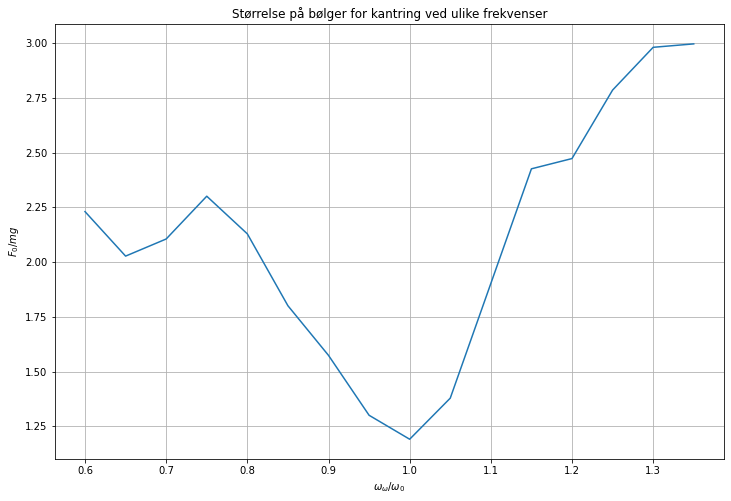

In [37]:
dt = 0.01                                           # tidssteg
t0 = 0                                              # t start
tend = 40                                           # t slutt
w0 = np.array([0, 0,0, y0_C,0,0])                   # Initialverdier
omega_0 = np.sqrt(m*g*h/I_c)                        # Skipets egenfrekvens
omega_fracs = np.arange(0.6, 1.4, 0.05)
F0_fracs = []

for i, omega_omega in enumerate(omega_0*omega_fracs):
    F0_frac = halveringsmetoden_F0(f_koblet_friksjon_bolge, 1*m*g, 3*m*g)
    F0_fracs.append(F0_frac/(m*g))

plt.figure(figsize=(12,8))
plt.plot(omega_fracs, F0_fracs)
plt.title("Størrelse på bølger for kantring ved ulike frekvenser")
plt.ylabel("$F_0/mg$")
plt.xlabel("$\omega_\omega/\omega_0$")
plt.grid()

Som vi ser har kurven et tydelig bunnpunkt når bølgefrekvensen er lik skipets egenfrekvens, som skyldes nettopp at vi får resonans. Dette betyr altså at den harmoniske kraften fra bølger og vind ved resonans kun trenger å være rundt $1.2mg$, mens den må oppmot $3mg$ dersom pådriverkraftens frekvens $\omega_\omega\approx1.3 \omega_0$. Det er altså tydelig at skipet mye enklere kantrer jo likere disse to vinkelfrekvensene er.

### Konklusjon ### 
For å oppsummere startet vi med å konstruere en skipsmodell og implementerte en måte å representere skipets bevegelse gjennom en rekke differensialligninger. For å løse disse differensialligningene har vi brukt ulike metoder av forskjellige ordner; Eulers metode, RK4-metode og Bogacki-Shampines metode. Vi har diskutert fordeler og ulemper med hver av disse metodene, både fra et teoretisk standpunkt men også kvantitativt gjennom vår skipsmodell. Her har iterasjonsmetoder som halveringsmetoden og fikspunktiterasjon vist seg svært hjelpsomme. I vår sammenligning så vi på størrelser som kjøretid, lokal feil og lokal trunkeringsfeil, som vi brukte til å tydeliggjøre egnet bruksområde for de ulike metodene. Her konkluderte vi blant annet med at Bogacki-Shampine ga oss kortest kjøretid, mens RK4 produserer minst lokal feil for en gitt steglengde. Lignende har vi også sett kvantitativt at Euler er en 1. ordens metode, mens RK4 er en 4. ordens metode. 

Vi har også sett at det er mange ulike faktorer som påvirker et skips stabilitet. Blant annet har vi sett at relativt tung last vil påvirke skipsdynamikk betydelig, spesielt om skipet har montert gjerde. Med startposisjon $s_L(t_0) = 3.0$ og  $m_L = 0.08m$ vil lasten skli til en side, hvor den vil bli liggende fast. Da vil skipet svinge rundt et nytt likevektspunkt $\theta_{likevekt}$. En lettere last vil ikke ha samme innvirkning på skipets bevegelse. Andre faktorer vi har sett på inkluderer bølger, vind og friksjon mellom skip og vann, som kan bidra til å dempe eller øke skipets vinkelutslag. Fra dette kan vi konkludere med at skipet naturlig nok lar seg påvirke av alle faktorer, og at en økt påvirkning fra en av de kan ha mye å si for om skipet kantrer eller ikke.

I siste deloppgave valgte vi oss som problemstilling å nærmere studere effekten av at frekvensen til vår harmoniske kraft ligger nær skipets egenfrekvens. Her fant vi at amplituden på den harmoniske kraften som kreves for å kantre skipet er minst når bølgefrekvensen er lik skipets egenfrekvens. Dette samsvarer med hva vi vet om resonans fra bølgefysikken.

